##### This dataset includes the nutritional information for Starbucks’ food and drink menu items. All nutritional information for drinks are for a 12oz     ( 340.194 g ) serving size.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

In [2]:
path = os.getcwd()
print(path)
path = "D:\SPRINGBOARD_1\_20_DataStoryTelling"
os.chdir(path)
os.listdir(path)
nutritionDF= pd.read_csv(os.path.join(path,r'starbucks_drinkMenu_expanded.csv'))

C:\Users\ECSCH1L25


In [3]:
nutritionDF.head()

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

    Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0             0.1             0.0                0.0             0   
1             0.1             0.0                0.0             0   
2             0.1             0.0                0.0             0   
3             0.1             0.0                0.0             0   
4             0.1             0.1                0.0             5   

    Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                          5                 0                   0   
1                         10                 0                   0   
2                         10                 0                   0   
3                         10                 0                   0   
4                         75                10                   0   

    Sugars (g)   Protein (g)  Vitamin A (% DV)  Vitamin C (% DV)  \
0            0            0.3                0%               0%   
1            0            0.5                0%               0%   
2            0            1.0                0%               0%   
3            0            1.0                0%               0%   
4            9            6.0               10%               0%   

   Calcium (% DV)  Iron (% DV)  Caffeine (mg)  
0               0%           0%           175  
1               0%           0%           260  
2               0%           0%           330  
3               2%           0%           410  
4              20%           0%            75

In [4]:
nutritionDF.describe()

Calories   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)  \
count  242.000000      242.000000      242.000000         242.000000   
mean   193.871901        2.904959        1.307025           0.037603   
std    102.863303        2.944376        1.640259           0.071377   
min      0.000000        0.000000        0.000000           0.000000   
25%    120.000000        0.200000        0.100000           0.000000   
50%    185.000000        2.500000        0.500000           0.000000   
75%    260.000000        4.500000        2.000000           0.100000   
max    510.000000       15.000000        9.000000           0.300000   

        Sodium (mg)   Total Carbohydrates (g)   Cholesterol (mg)  \
count    242.000000                 242.000000        242.000000   
mean       6.363636                 128.884298         35.991736   
std        8.630257                  82.303223         20.795186   
min        0.000000                   0.000000          0.000000   
25%        0.000000                  70.000000         21.000000   
50%        5.000000                 125.000000         34.000000   
75%       10.000000                 170.000000         50.750000   
max       40.000000                 340.000000         90.000000   

        Dietary Fibre (g)   Sugars (g)   Protein (g)   
count          242.000000   242.000000     242.000000  
mean             0.805785    32.962810       6.978512  
std              1.445944    19.730199       4.871659  
min              0.000000     0.000000       0.000000  
25%              0.000000    18.000000       3.000000  
50%              0.000000    32.000000       6.000000  
75%              1.000000    43.750000      10.000000  
max              8.000000    84.000000      20.000000

In [5]:
nutritionDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    float64
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [6]:
ObjCols = nutritionDF.select_dtypes(include="O")
print(ObjCols)
objtoNum = ['Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ']

for col in objtoNum:
    nutritionDF[col] =  nutritionDF[col].map(lambda x: str(x)[:-1])
#   nutritionDF[col] = pd.to_numeric(col, errors="coerce")
    nutritionDF[col] = nutritionDF[col].apply(pd.to_numeric, errors='coerce')
    nutritionDF[col].fillna(0)
    nutritionDF[col] = nutritionDF[col]/100

nutritionDF.head()

              Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
237  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
241  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   

          Beverage_prep Vit

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

    Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0             0.1             0.0                0.0             0   
1             0.1             0.0                0.0             0   
2             0.1             0.0                0.0             0   
3             0.1             0.0                0.0             0   
4             0.1             0.1                0.0             5   

    Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                          5                 0                   0   
1                         10                 0                   0   
2                         10                 0                   0   
3                         10                 0                   0   
4                         75                10                   0   

    Sugars (g)   Protein (g)   Vitamin A (% DV)   Vitamin C (% DV)  \
0            0            0.3                0.0               0.0   
1            0            0.5                0.0               0.0   
2            0            1.0                0.0               0.0   
3            0            1.0                0.0               0.0   
4            9            6.0                0.1               0.0   

    Calcium (% DV)   Iron (% DV)  Caffeine (mg)  
0              0.00           0.0           175  
1              0.00           0.0           260  
2              0.00           0.0           330  
3              0.02           0.0           410  
4              0.20           0.0            75

In [7]:
#Encode Varies as 1010 and convert caffeine as numeric column
nutritionDF['Caffeine (mg)']=nutritionDF['Caffeine (mg)'].replace("Varies","1010")
nutritionDF['Caffeine (mg)']=nutritionDF['Caffeine (mg)'].replace("varies","1010")
nutritionDF['Caffeine (mg)']=nutritionDF['Caffeine (mg)'].astype('float')

In [8]:
#Convert mg values to gram
mg = [' Sodium (mg)','Cholesterol (mg)','Caffeine (mg)']

for col in mg:
    nutritionDF[col]=nutritionDF[col]/1000
    
#Rename columns from mg to gram    
nutritionDF=nutritionDF.rename(columns={" Sodium (mg)":" Sodium (g)" , "Cholesterol (mg)":"Cholesterol (g)" , "Caffeine (mg)":"Caffeine (g)" })
nutritionDF

Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
237  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
241  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   

          Beverage_prep  Calories   Total Fat (g)  Trans Fat (g)   \
0                 Short         3             0.1             0.0   
1                  Tall         4             0.1             0.0   
2                Grande         5             0.1             0.0   
3                 Venti         5             0.1             0.0   
4     Short Nonfat Milk        70             0.1             0.1   
..                  ...       ...             ...             ...   
237             Soymilk       320             3.2             0.4   
238    Tall Nonfat Milk       170             0.1             0.1   
239          Whole Milk       200             3.5             2.0   
240             Soymilk       180             1.5             0.2   
241  Grande Nonfat Milk       240             0.1             0.1   

     Saturated Fat (g)   Sodium (g)   Total Carbohydrates (g)   \
0                  0.0        0.000                          5   
1                  0.0        0.000                         10   
2                  0.0        0.000                         10   
3                  0.0        0.000                         10   
4                  0.0        0.005                         75   
..                 ...          ...                        ...   
237                0.0        0.000                        250   
238                0.0        0.000                        160   
239                0.1        0.010                        160   
240                0.0        0.000                        160   
241                0.0        0.005                        230   

     Cholesterol (g)   Dietary Fibre (g)   Sugars (g)   Protein (g)   \
0              0.000                   0            0            0.3   
1              0.000                   0            0            0.5   
2              0.000                   0            0            1.0   
3              0.000                   0            0            1.0   
4              0.010                   0            9            6.0   
..               ...                 ...          ...            ...   
237            0.067                   1           64            5.0   
238            0.039                   0           38            4.0   
239            0.039                   0           38            3.0   
240            0.037                   1           35            3.0   
241            0.056                   0           55            5.0   

     Vitamin A (% DV)   Vitamin C (% DV)   Calcium (% DV)   Iron (% DV)   \
0                 0.00              0.00              0.00          0.00   
1                 0.00              0.00              0.00          0.00   
2                 0.00              0.00              0.00          0.00   
3                 0.00              0.00              0.02          0.00   
4                 0.10              0.00              0.20          0.00   
..                 ...               ...               ...           ...   
237               0.06

In [9]:
nutritionDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    float64
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (g)                242 non-null    float64
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (g)            242 non-null    float64
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    float64

array([[<AxesSubplot:title={'center':'Calories'}>,
        <AxesSubplot:title={'center':' Total Fat (g)'}>,
        <AxesSubplot:title={'center':'Trans Fat (g) '}>,
        <AxesSubplot:title={'center':'Saturated Fat (g)'}>],
       [<AxesSubplot:title={'center':' Sodium (g)'}>,
        <AxesSubplot:title={'center':' Total Carbohydrates (g) '}>,
        <AxesSubplot:title={'center':'Cholesterol (g)'}>,
        <AxesSubplot:title={'center':' Dietary Fibre (g)'}>],
       [<AxesSubplot:title={'center':' Sugars (g)'}>,
        <AxesSubplot:title={'center':' Protein (g) '}>,
        <AxesSubplot:title={'center':'Vitamin A (% DV) '}>,
        <AxesSubplot:title={'center':'Vitamin C (% DV)'}>],
       [<AxesSubplot:title={'center':' Calcium (% DV) '}>,
        <AxesSubplot:title={'center':'Iron (% DV) '}>,
        <AxesSubplot:title={'center':'Caffeine (g)'}>, <AxesSubplot:>]],
      dtype=object)

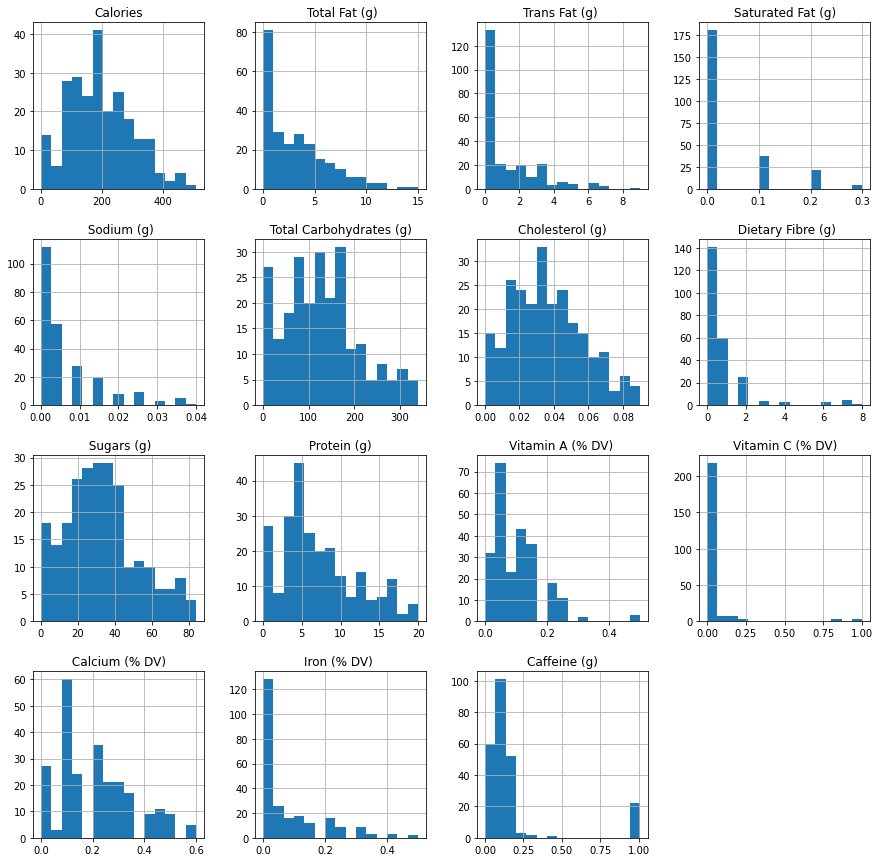

In [10]:
nutritionDF.hist(bins=15,figsize=(15,15))
# sns.distplot(nutritionDF.drop(['Beverage_category','Beverage','Beverage_prep'] , axis=1))

##### Visualaizing Outliers 

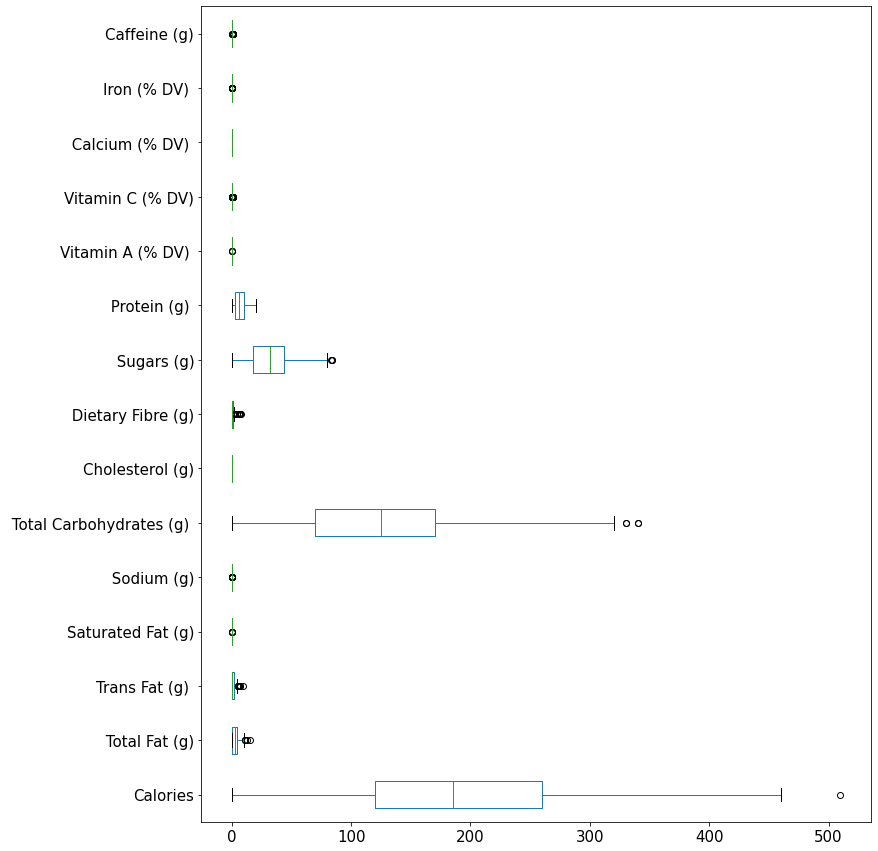

In [11]:
boxplot = nutritionDF.boxplot(grid=False, vert=False,fontsize=15 , figsize=(12,15))

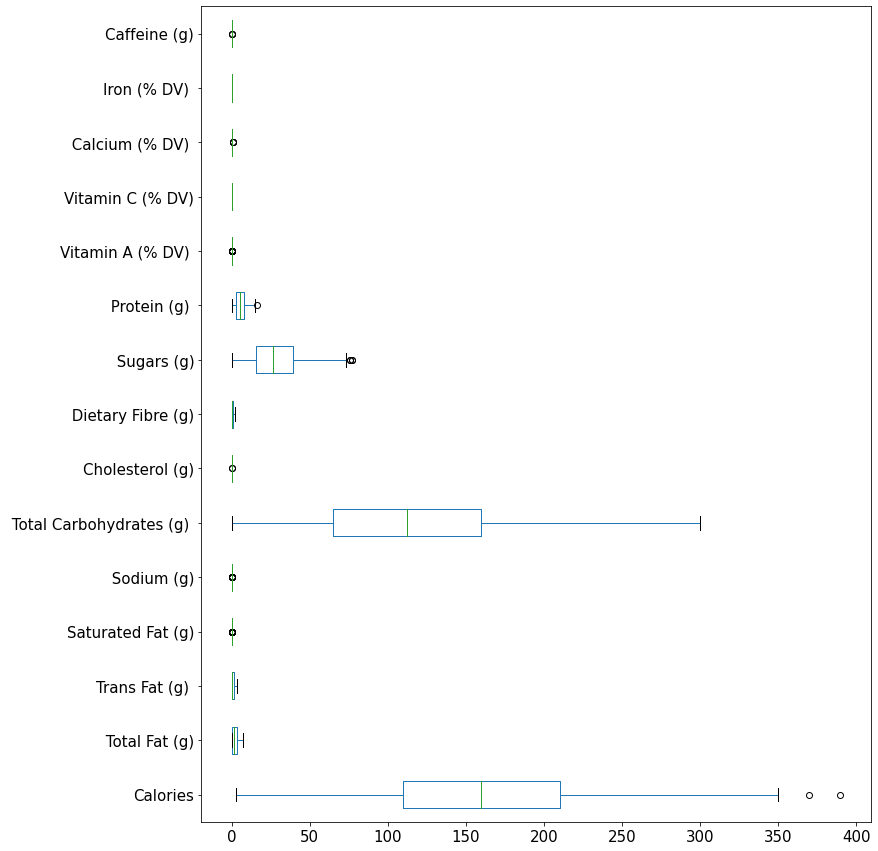

In [12]:
Q1 = nutritionDF.quantile(0.25)

# Now get Q3 and store in a variable called Q3. 
Q3 = nutritionDF.quantile(0.75)
# Now calculate the IQR, storing it in a variable called IQR.
IQR = Q3 - Q1 
# Make a variable called `dfno`, and assign it the value: df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]. 
# This filters on our existing dataframe, picking out just those observations that are NOT outliers. 
nutritionDF= nutritionDF[~((nutritionDF < (Q1 - 1.5 * IQR)) |(nutritionDF> (Q3 + 1.5 * IQR))).any(axis=1)]
# We now want to make a boxplot of this new dataframe dfno. 
boxplot = nutritionDF.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

In [13]:
nutritionDF.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (g)',
       ' Total Carbohydrates (g) ', 'Cholesterol (g)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (g)'],
      dtype='object')

In [42]:
meanDF = nutritionDF.groupby(['Beverage_category','Beverage','Beverage_prep'])['Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (g)',
       ' Total Carbohydrates (g) ', 'Cholesterol (g)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (g)'].mean()

meanDF

<ipython-input-42-6e88a51cb9fc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meanDF = nutritionDF.groupby(['Beverage_category','Beverage','Beverage_prep'])['Calories',


Calories  \
Beverage_category       Beverage                                        Beverage_prep                  
Classic Espresso Drinks Caffè Americano                                 Grande                  15.0   
                                                                        Short                    5.0   
                                                                        Tall                    10.0   
                        Caffè Latte                                     2% Milk                125.0   
                                                                        Grande Nonfat Milk     130.0   
...                                                                                              ...   
Tazo® Tea Drinks        Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos) Grande Nonfat Milk     150.0   
                                                                        Short Nonfat Milk       80.0   
                                                                        Soymilk                147.5   
                                                                        Tall Nonfat Milk       120.0   
                                                                        Venti Nonfat Milk      190.0   

                                                                                             Total Fat (g)  \
Beverage_category       Beverage                                        Beverage_prep                        
Classic Espresso Drinks Caffè Americano                                 Grande                       0.000   
                                                                        Short                        0.000   
                                                                        Tall                         0.000   
                        Caffè Latte                                     2% Milk                      4.750   
                                                                        Grande Nonfat Milk           0.300   
...                                                                                                    ...   
Tazo® Tea Drinks        Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos) Grande Nonfat Milk           0.200   
                                                                        Short Nonfat Milk            0.100   
                                                                        Soymilk                      2.875   
                                                                        Tall Nonfat Milk             0.100   
                                                                        Venti Nonfat Milk            0.200   

                                                                                            Trans Fat (g)   \
Beverage_category       Beverage                                        Beverage_prep                        
Classic Espresso Drinks Caffè Americano                                 Grande                        0.00   
                                                                        Short                         0.00   
                                                                        Tall                          0.00   
                        Caffè Latte                                     2% Milk                       2.50   
                                                                        Grande Nonfat Milk            0.20   
...                                                                                                    ...   
Tazo® Tea Drinks        Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos) Grande Nonfat Milk            0.10   
                                                                        Short Nonfat Milk             0.10   
                                                                        Soymilk                       0.35   
                                                                        Tall Nonfat Milk          

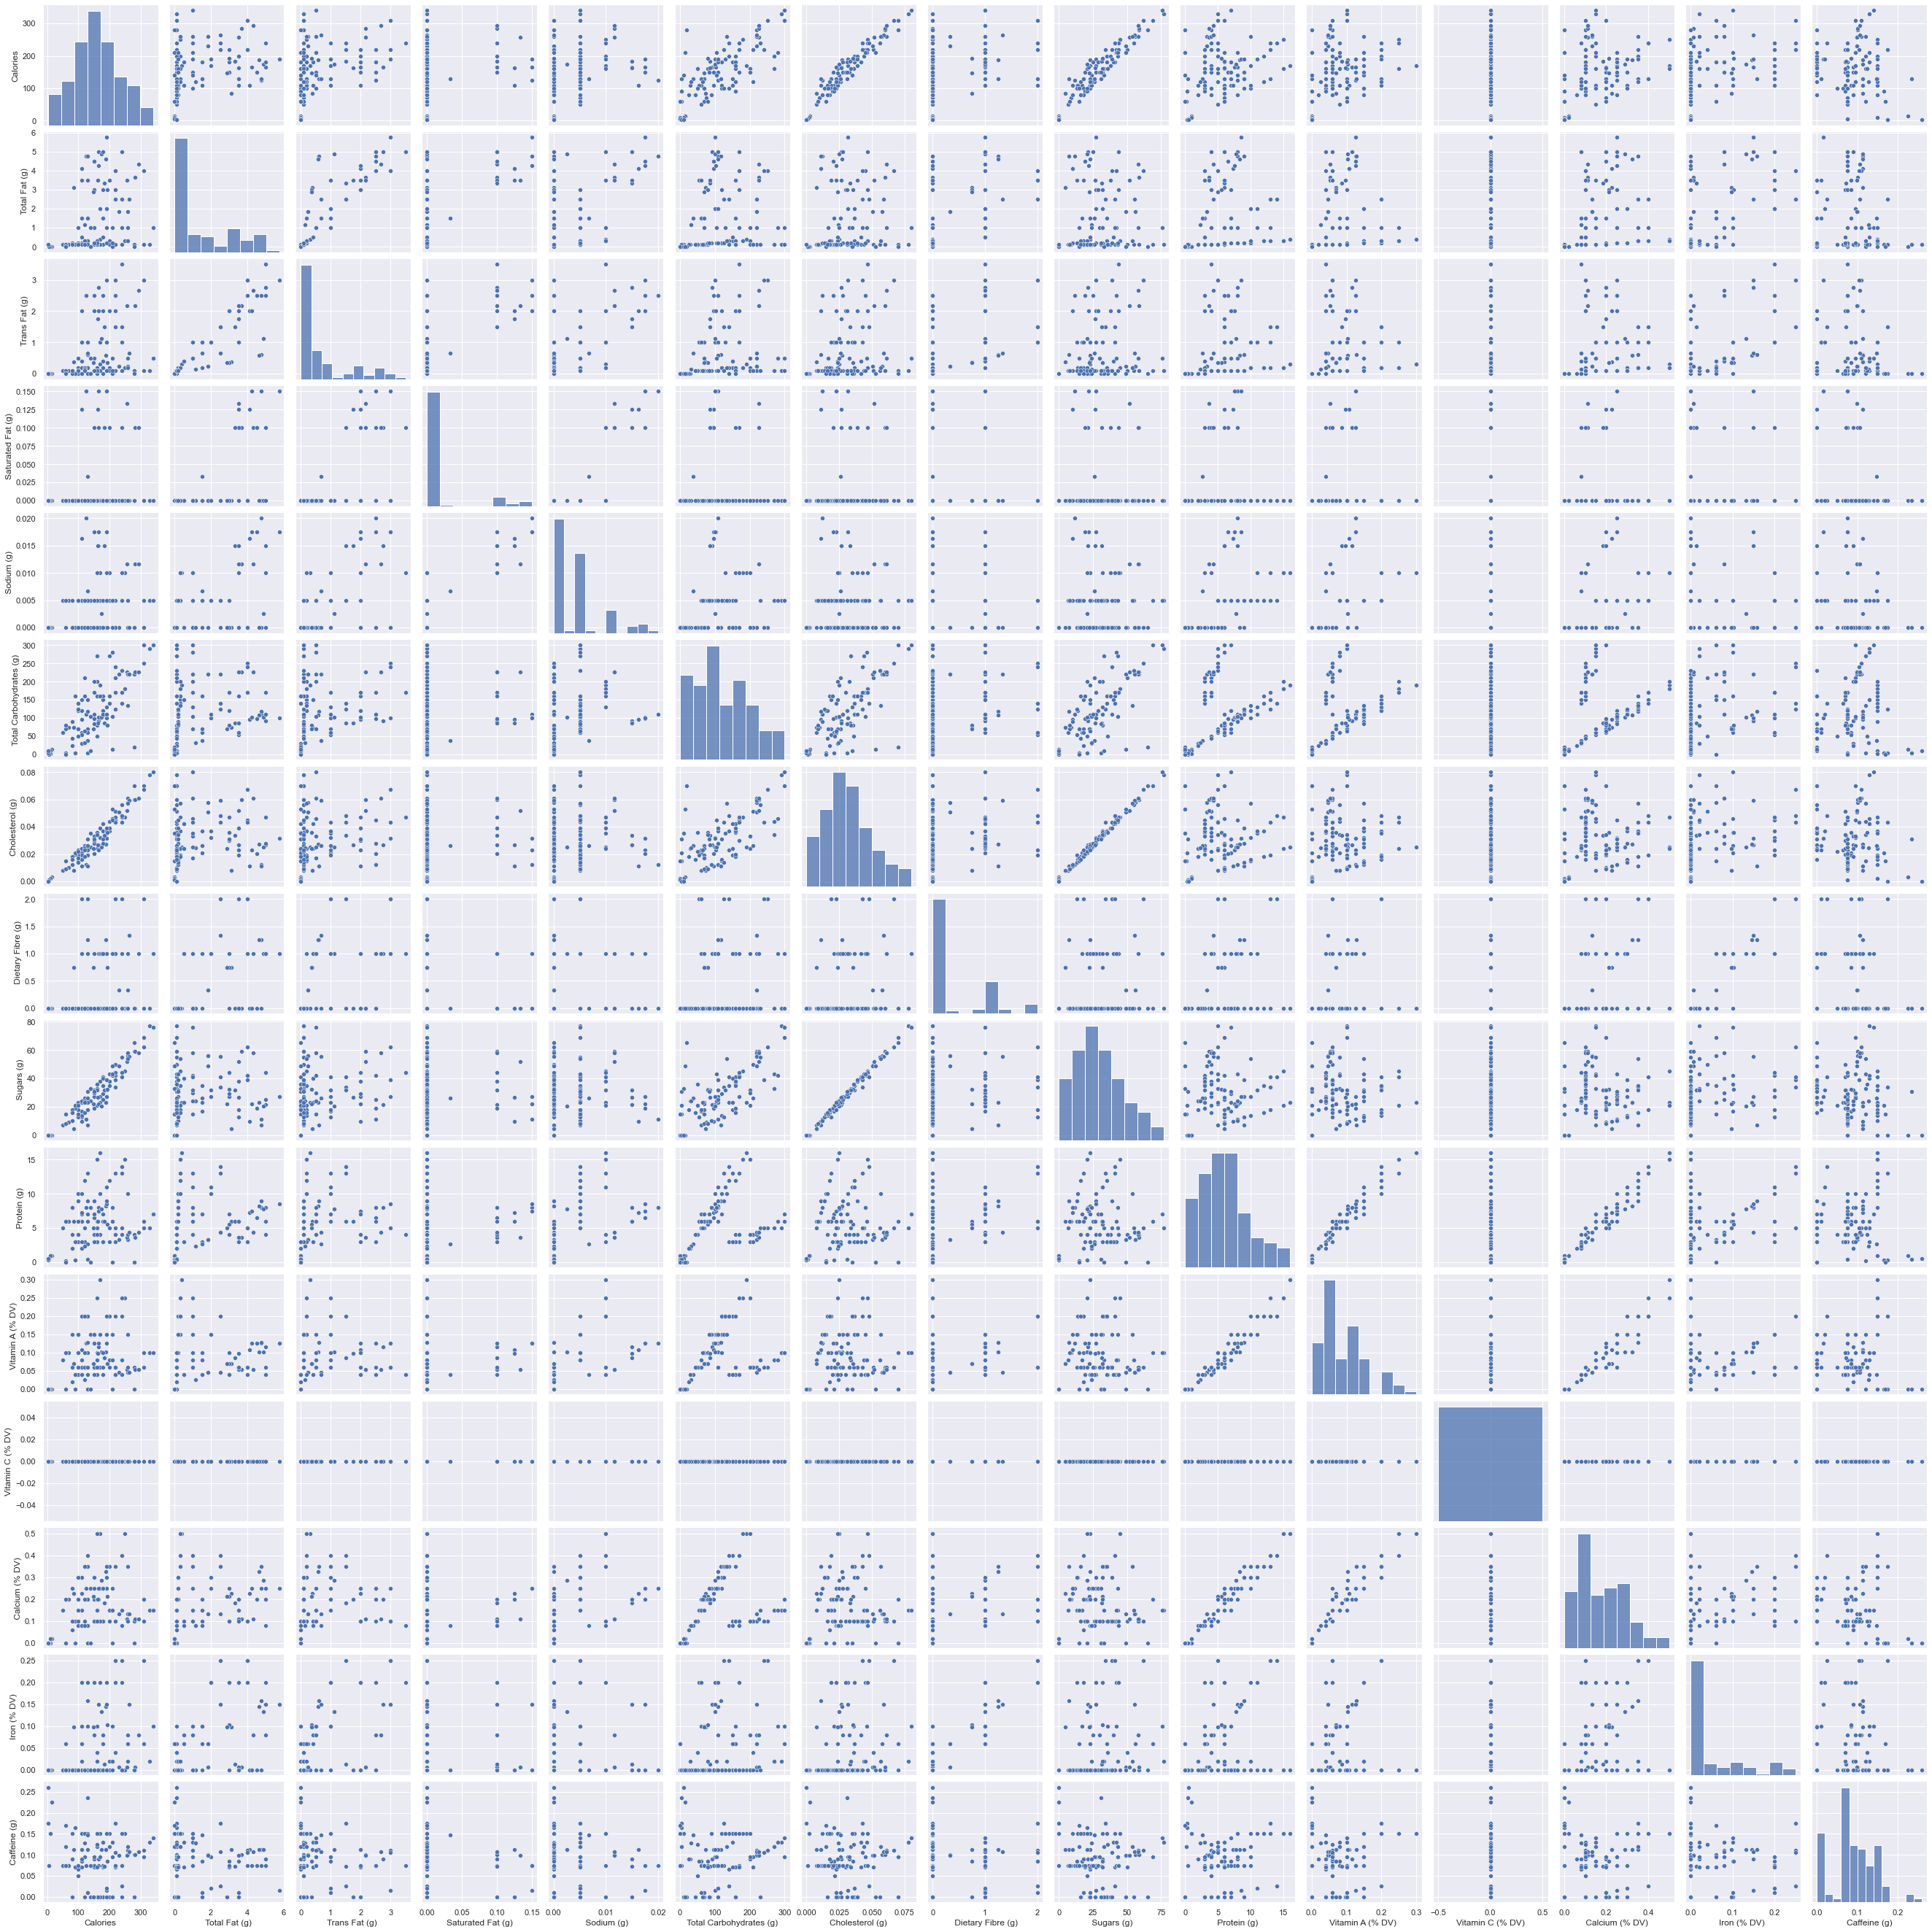

In [94]:
sns.set(font_scale=1)
sns.pairplot(meanDF)


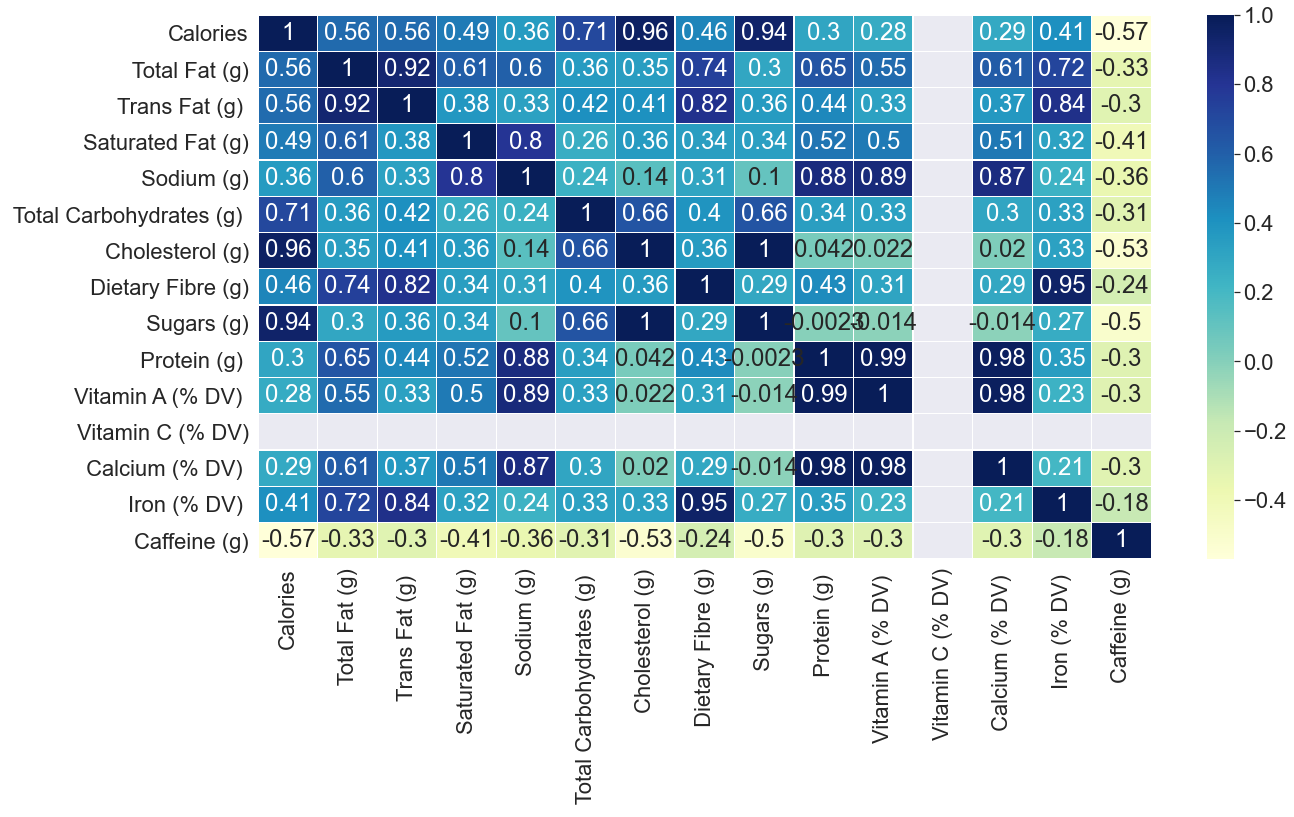

In [33]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.heatmap(meanDF.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

### From the pairplot , we can see a couple of dependencies between several components
 - **Sugar , calories , carbohydrates and cholestrol** are directly related to each other - Diabetics should be careful
 - **Vitamin A , Calcium and Protein** are directly related to each other 
 - **Iron and dietary fibre** are directly related to each other  

In [52]:
frappyDF = meanDF.loc[['Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee','Frappuccino® Blended Crème']]
frappyDF

Calories  \
Beverage_category                 Beverage                             Beverage_prep                    
Frappuccino® Blended Coffee       Caramel (Without Whipped Cream)      Grande Nonfat Milk  280.000000   
                                                                       Soymilk             260.000000   
                                                                       Tall Nonfat Milk    180.000000   
                                                                       Venti Nonfat Milk   330.000000   
                                                                       Whole Milk          283.333333   
                                  Coffee                               Grande Nonfat Milk  220.000000   
                                                                       Soymilk             230.000000   
                                                                       Tall Nonfat Milk    160.000000   
                                                                       Venti Nonfat Milk   310.000000   
                                                                       Whole Milk          256.666667   
                                  Java Chip (Without Whipped Cream)    Grande Nonfat Milk  310.000000   
                                                                       Soymilk             220.000000   
                                                                       Tall Nonfat Milk    220.000000   
                                                                       Whole Milk          240.000000   
                                  Mocha (Without Whipped Cream)        Grande Nonfat Milk  260.000000   
                                                                       Soymilk             263.333333   
                                                                       Tall Nonfat Milk    180.000000   
                                                                       Venti Nonfat Milk   340.000000   
                                                                       Whole Milk          293.333333   
Frappuccino® Light Blended Coffee Caramel                              Grande Nonfat Milk  150.000000   
                                                                       Tall Nonfat Milk    100.000000   
                                                                       Venti Nonfat Milk   200.000000   
                                  Coffee                               Grande Nonfat Milk  120.000000   
                                                                       Tall Nonfat Milk     90.000000   
                                                                       Venti Nonfat Milk   160.000000   
                                  Java Chip                            Grande Nonfat Milk  220.000000   
                                                                       Tall Nonfat Milk    150.000000   
                                  Mocha                                Grande Nonfat Milk  150.000000   
                                                                       Tall Nonfat Milk    110.000000   
                                                                       Venti Nonfat Milk   210.000000   
Frappuccino® Blended Crème        Vanilla Bean (Without Whipped Cream) Grande Nonfat Milk  240.000000   
                                                                       Soymilk             180.000000   
                                                                       Tall Nonfat Milk    170.000000   
                                                                       Whole Milk          200.000000   

                                                                                            Total Fat (g)  \
Beverage_category                 Beverage                             Beverage_prep                        
Frappuccino® Blended Coffee       Caramel (Without Whipped Cream)      Grande Nonfat Milk     

# DIABETICS RECOMMENDATIONS


### Comparing Calories and Cholestrol concentration of Frappy types 

In [53]:
frappyDF = frappyDF.reset_index(level=['Beverage_category','Beverage_prep','Beverage'])
frappyDF

Beverage_category                              Beverage  \
0         Frappuccino® Blended Coffee       Caramel (Without Whipped Cream)   
1         Frappuccino® Blended Coffee       Caramel (Without Whipped Cream)   
2         Frappuccino® Blended Coffee       Caramel (Without Whipped Cream)   
3         Frappuccino® Blended Coffee       Caramel (Without Whipped Cream)   
4         Frappuccino® Blended Coffee       Caramel (Without Whipped Cream)   
5         Frappuccino® Blended Coffee                                Coffee   
6         Frappuccino® Blended Coffee                                Coffee   
7         Frappuccino® Blended Coffee                                Coffee   
8         Frappuccino® Blended Coffee                                Coffee   
9         Frappuccino® Blended Coffee                                Coffee   
10        Frappuccino® Blended Coffee     Java Chip (Without Whipped Cream)   
11        Frappuccino® Blended Coffee     Java Chip (Without Whipped Cream)   
12        Frappuccino® Blended Coffee     Java Chip (Without Whipped Cream)   
13        Frappuccino® Blended Coffee     Java Chip (Without Whipped Cream)   
14        Frappuccino® Blended Coffee         Mocha (Without Whipped Cream)   
15        Frappuccino® Blended Coffee         Mocha (Without Whipped Cream)   
16        Frappuccino® Blended Coffee         Mocha (Without Whipped Cream)   
17        Frappuccino® Blended Coffee         Mocha (Without Whipped Cream)   
18        Frappuccino® Blended Coffee         Mocha (Without Whipped Cream)   
19  Frappuccino® Light Blended Coffee                               Caramel   
20  Frappuccino® Light Blended Coffee                               Caramel   
21  Frappuccino® Light Blended Coffee                               Caramel   
22  Frappuccino® Light Blended Coffee                                Coffee   
23  Frappuccino® Light Blended Coffee                                Coffee   
24  Frappuccino® Light Blended Coffee                                Coffee   
25  Frappuccino® Light Blended Coffee                             Java Chip   
26  Frappuccino® Light Blended Coffee                             Java Chip   
27  Frappuccino® Light Blended Coffee                                 Mocha   
28  Frappuccino® Light Blended Coffee                                 Mocha   
29  Frappuccino® Light Blended Coffee                                 Mocha   
30         Frappuccino® Blended Crème  Vanilla Bean (Without Whipped Cream)   
31         Frappuccino® Blended Crème  Vanilla Bean (Without Whipped Cream)   
32         Frappuccino® Blended Crème  Vanilla Bean (Without Whipped Cream)   
33         Frappuccino® Blended Crème  Vanilla Bean (Without Whipped Cream)   

         Beverage_prep    Calories   Total Fat (g)  Trans Fat (g)   \
0   Grande Nonfat Milk  280.000000        0.100000        0.100000   
1              Soymilk  260.000000        1.833333        0.233333   
2     Tall Nonfat Milk  180.000000        0.100000        0.000000   
3    Venti Nonfat Milk  330.000000        0.100000        0.100000   
4           Whole Milk  283.333333        3.666667        2.166667   
5   Grande Nonfat Milk  220.000000        0.100000        0.100000   
6              Soymilk  230.000000        1.833333        0.233333   
7     Tall Nonfat Milk  160.000000        0.100000        0.000000   
8    Venti Nonfat Milk  310.000000        0.100000        0.100000   
9           Whole Milk  256.666667        3.500000        2.166667   
10  Grande Nonfat Milk  310.000000        4.000000        3.000000   
11             Soymilk  220.000000        4.000000        2.500000   
12    Tall Nonfat Milk  220.000000        3.000000        2.000000   
13          Whole Milk  240.000000        5.000000        3.500000   
14  Grande Nonfat Milk  260.000000        1.000000        0.500000   
15             Soymilk  263.333333        2.500000        0.666667   
16    Tall Nonfat Milk  180.000000        0.500000        0.4000

# Method 1 
#### Comparing Beverage prep in each Frappy category

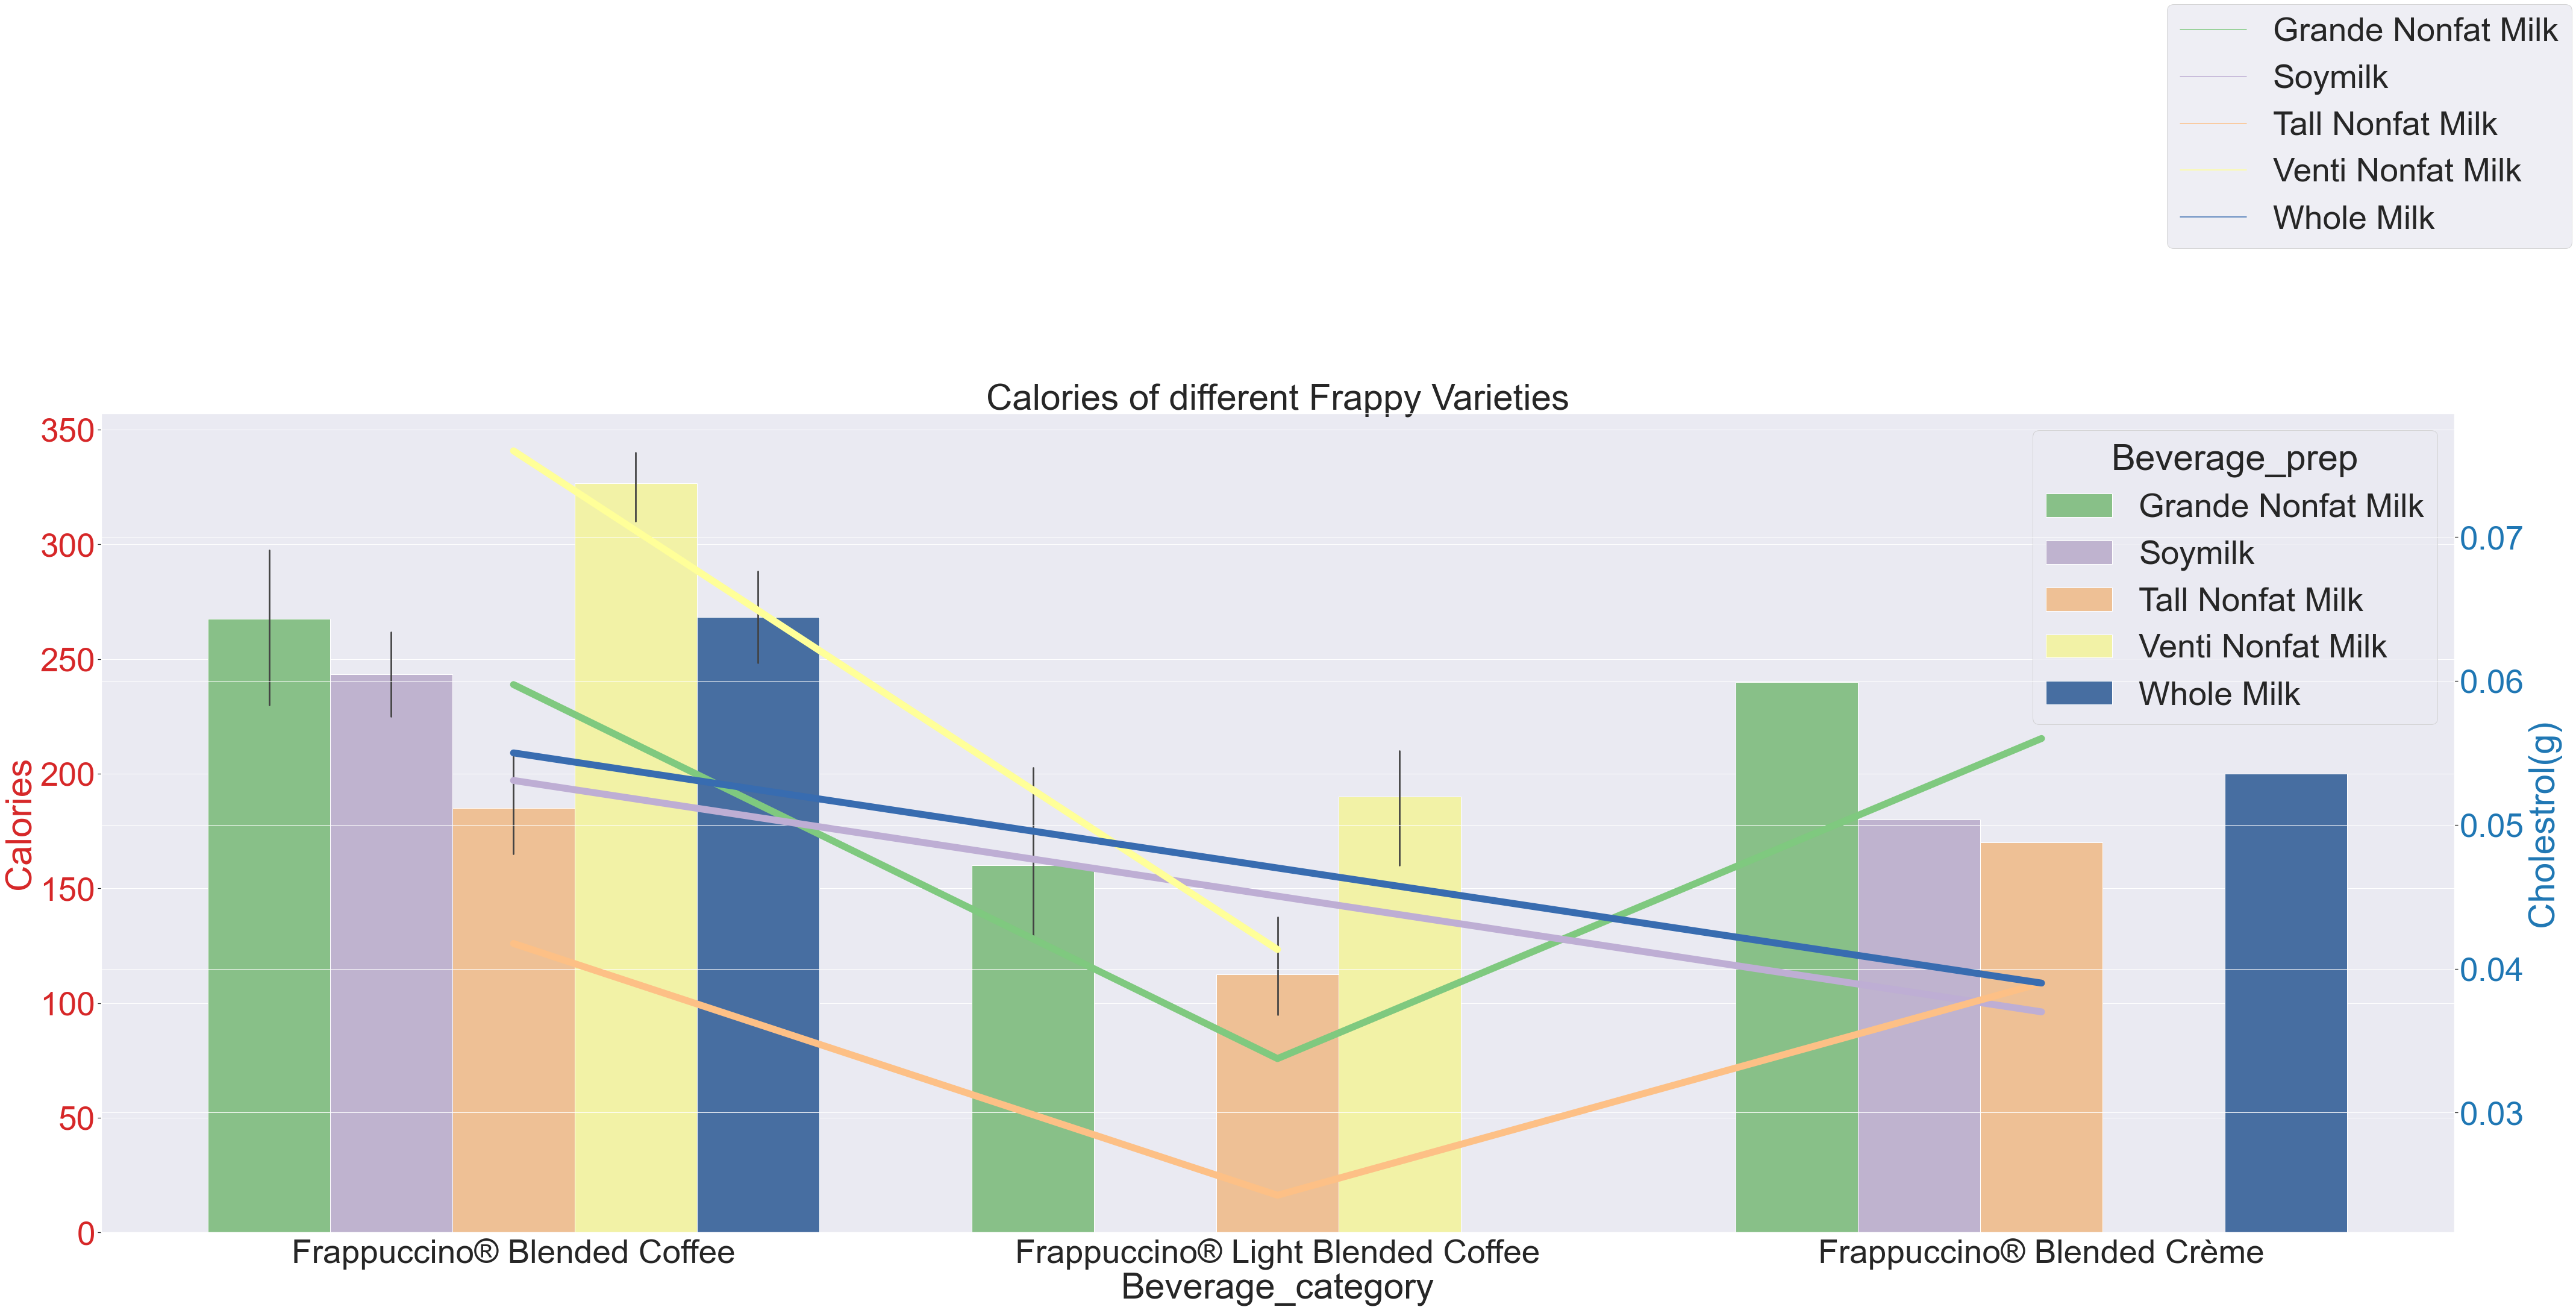

In [55]:
sns.set_style("dark")
sns.set(font_scale=5)
fig,ax1=plt.subplots(figsize=(70,25))

color = 'tab:red'
ax1.set_xlabel('Frappy Types')
ax1.set_ylabel('Calories(g)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.title('Calories of different Frappy Varieties')
ax1 = sns.barplot(x='Beverage_category', y="Calories", hue="Beverage_prep", data=frappyDF ,palette="Accent")


#The histogram distribution of Calories and Cholestrol are similar to each other , so we might build 2 y-axes in the graph for each

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Cholestrol(g)', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)

ax2 = sns.lineplot(x='Beverage_category', y='Cholesterol (g)', hue="Beverage_prep", data=frappyDF ,palette="Accent",linewidth = 11.5 , ci=0)
plt.legend(bbox_to_anchor=(1.05, 1.5),borderaxespad=0)

plt.show()

### So next time you go out with a diabetic patient , recommend them to drink a Light Blended Frappy made of Tall Nonfat Milk

# Method 2
### Average Calories and Cholestrol Level of Each Frappy Category

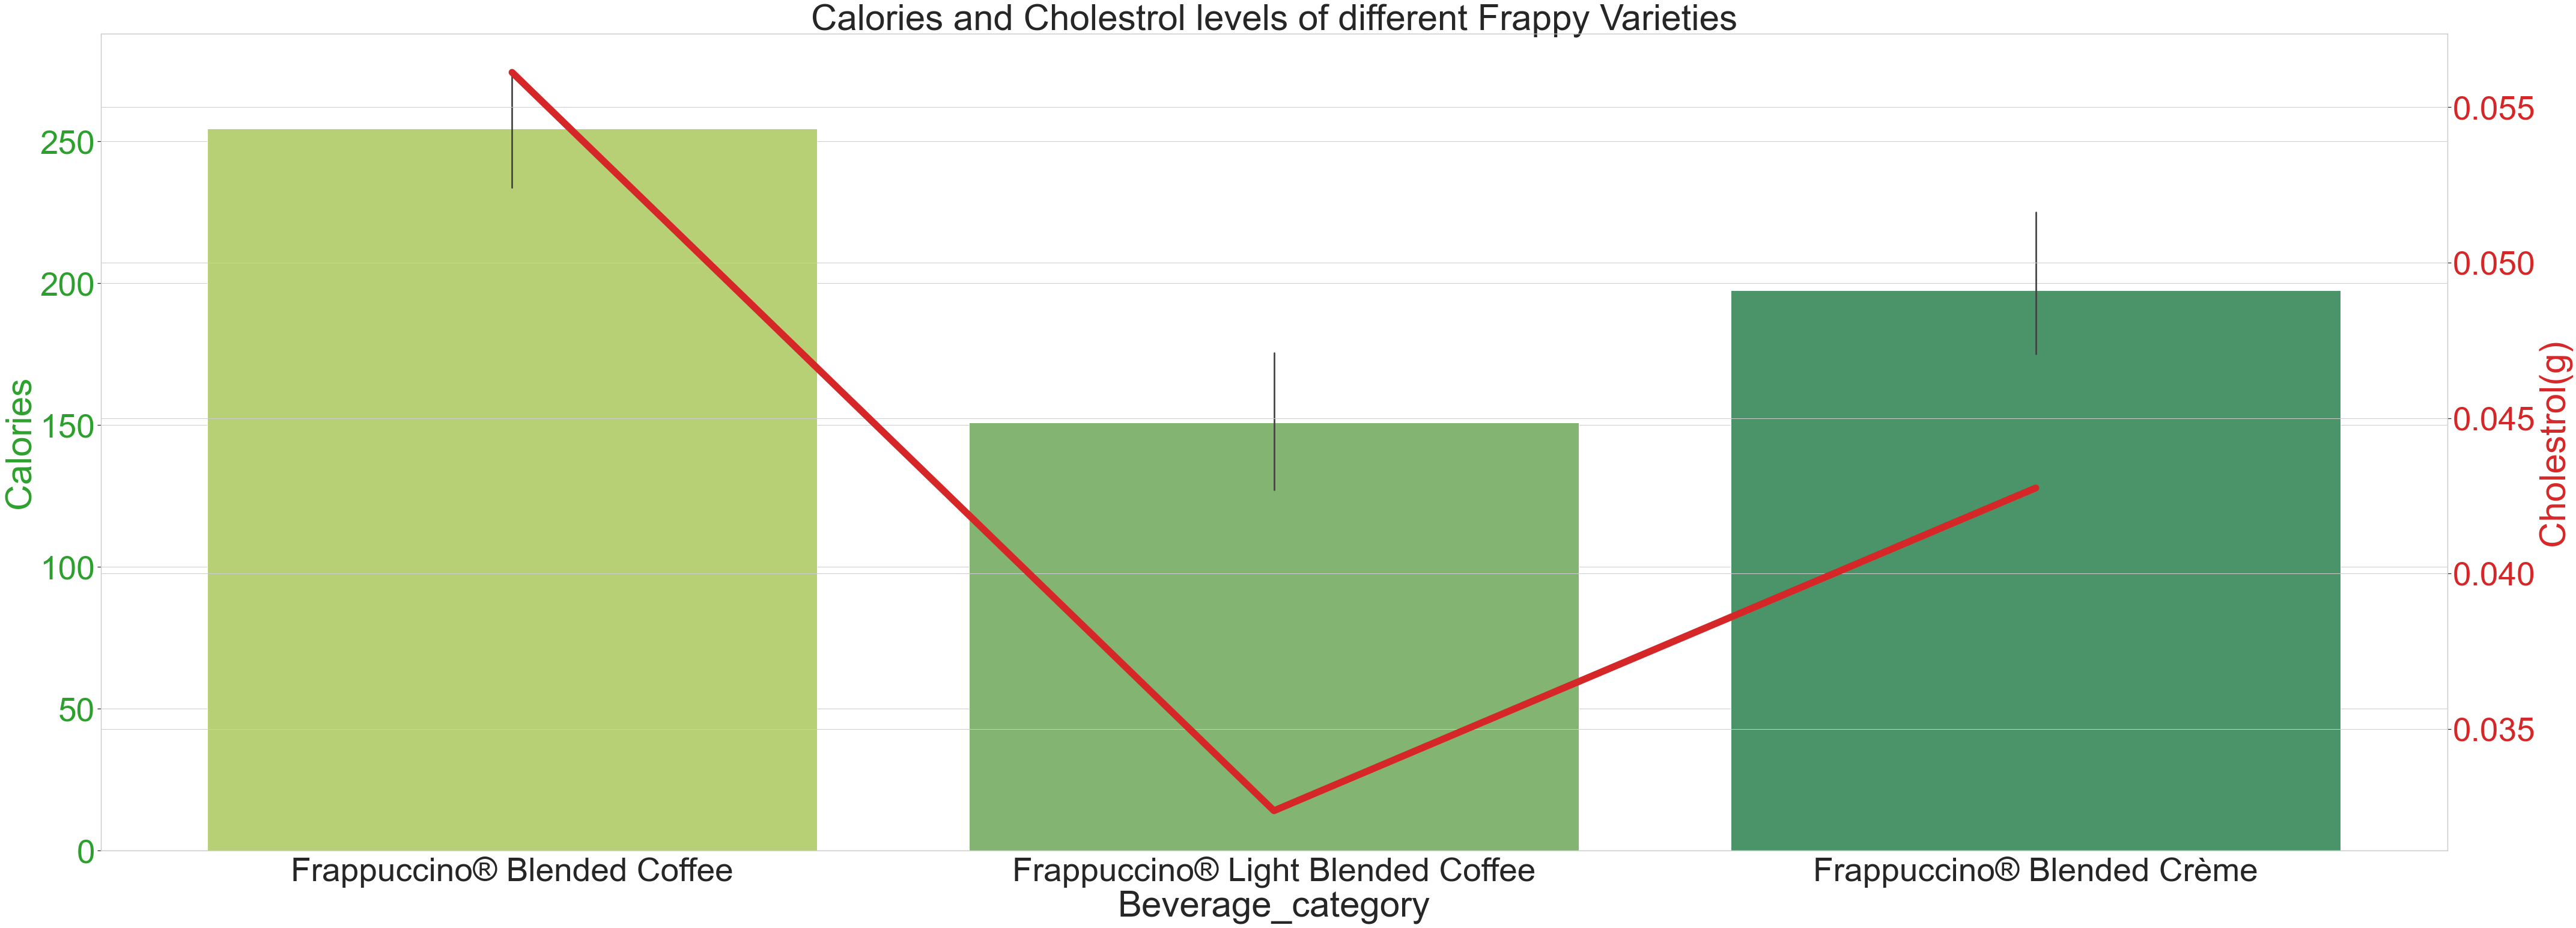

In [56]:
#Create combo chart
sns.set_style("whitegrid")
fig, ax3 = plt.subplots(figsize=(70,25))
color = 'tab:green'
#bar plot creation
plt.title('Calories and Cholestrol levels of different Frappy Varieties')
ax3.set_xlabel('Frappy Types')
ax3.set_ylabel('Calories(g)' , color=color)
ax3 = sns.barplot(x='Beverage_category', y='Calories', data = frappyDF, palette='summer_r')
ax3.tick_params(axis='y' , labelcolor=color)

#specify we want to share the same x-axis
ax4 = ax3.twinx()

color = 'tab:red'
#line plot creation
ax4.set_ylabel('Cholestrol(g)',color=color)
ax4 = sns.lineplot(x='Beverage_category', y='Cholesterol (g)', data = frappyDF, color=color , linewidth=11.5 , ci = 0 )
ax4.tick_params(axis='y', labelcolor=color)
#show plot
plt.show()

### We can see that Bended coffee has the highest calories and cholestrol levels whereas light blended frappy has the least cholestrol level and is preferrably more healthy . 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Brewed Coffee'),
  Text(1, 0, 'Caffè Latte'),
  Text(2, 0, 'Caffè Mocha (Without Whipped Cream)'),
  Text(3, 0, 'Vanilla Latte (Or Other Flavoured Latte)'),
  Text(4, 0, 'Caffè Americano'),
  Text(5, 0, 'Cappuccino'),
  Text(6, 0, 'Espresso'),
  Text(7, 0, 'Skinny Latte (Any Flavour)'),
  Text(8, 0, 'Caramel Macchiato'),
  Text(9, 0, 'White Chocolate Mocha (Without Whipped Cream)'),
  Text(10, 0, 'Hot Chocolate (Without Whipped Cream)'),
  Text(11, 0, 'Caramel Apple Spice (Without Whipped Cream)'),
  Text(12, 0, 'Tazo® Chai Tea Latte'),
  Text(13, 0, 'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)'),
  Text(14, 0, 'Iced Brewed Coffee (With Classic Syrup)'),
  Text(15, 0, 'Iced Brewed Coffee (With Milk & Classic Syrup)'),
  Text(16, 0, 'Shaken Iced Tazo® Tea (With Classic Syrup)'),
  Text(17, 0, 'Coffee'),
  Text(18, 0, 'Mocha (Without Whipped Cream)'),
  

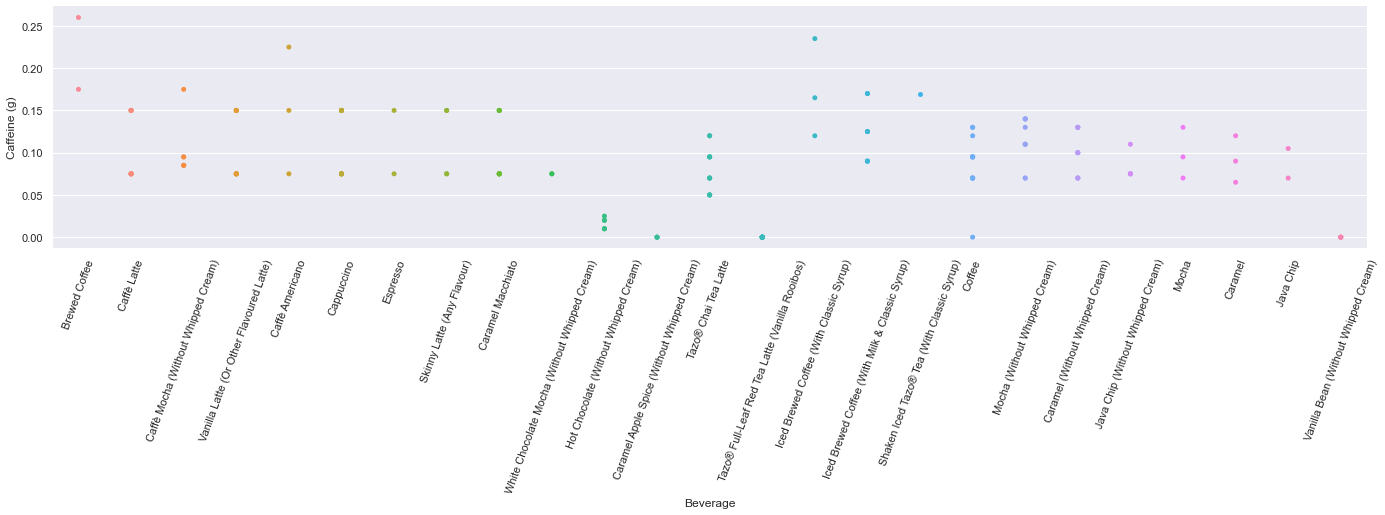

In [88]:
color = 'tab:red'
ax1.set_xlabel('Frappy Types')
ax1.set_ylabel('Calories(g)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
sns.catplot(x="Beverage", y='Caffeine (g)', jitter=False, data=nutritionDF, height = 4, aspect = 5 )
sns.set(font_scale=1)
plt.xticks(rotation=70)

### From the above catplot , we can see that brewed coffee varieties have a lot of caffiene content 

In [61]:
nutritionDF.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (g)',
       ' Total Carbohydrates (g) ', 'Cholesterol (g)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (g)'],
      dtype='object')

# Comparing Iron Content 

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Coffee'),
  Text(1, 0, 'Classic Espresso Drinks'),
  Text(2, 0, 'Signature Espresso Drinks'),
  Text(3, 0, 'Tazo® Tea Drinks'),
  Text(4, 0, 'Shaken Iced Beverages'),
  Text(5, 0, 'Frappuccino® Blended Coffee'),
  Text(6, 0, 'Frappuccino® Light Blended Coffee'),
  Text(7, 0, 'Frappuccino® Blended Crème')])

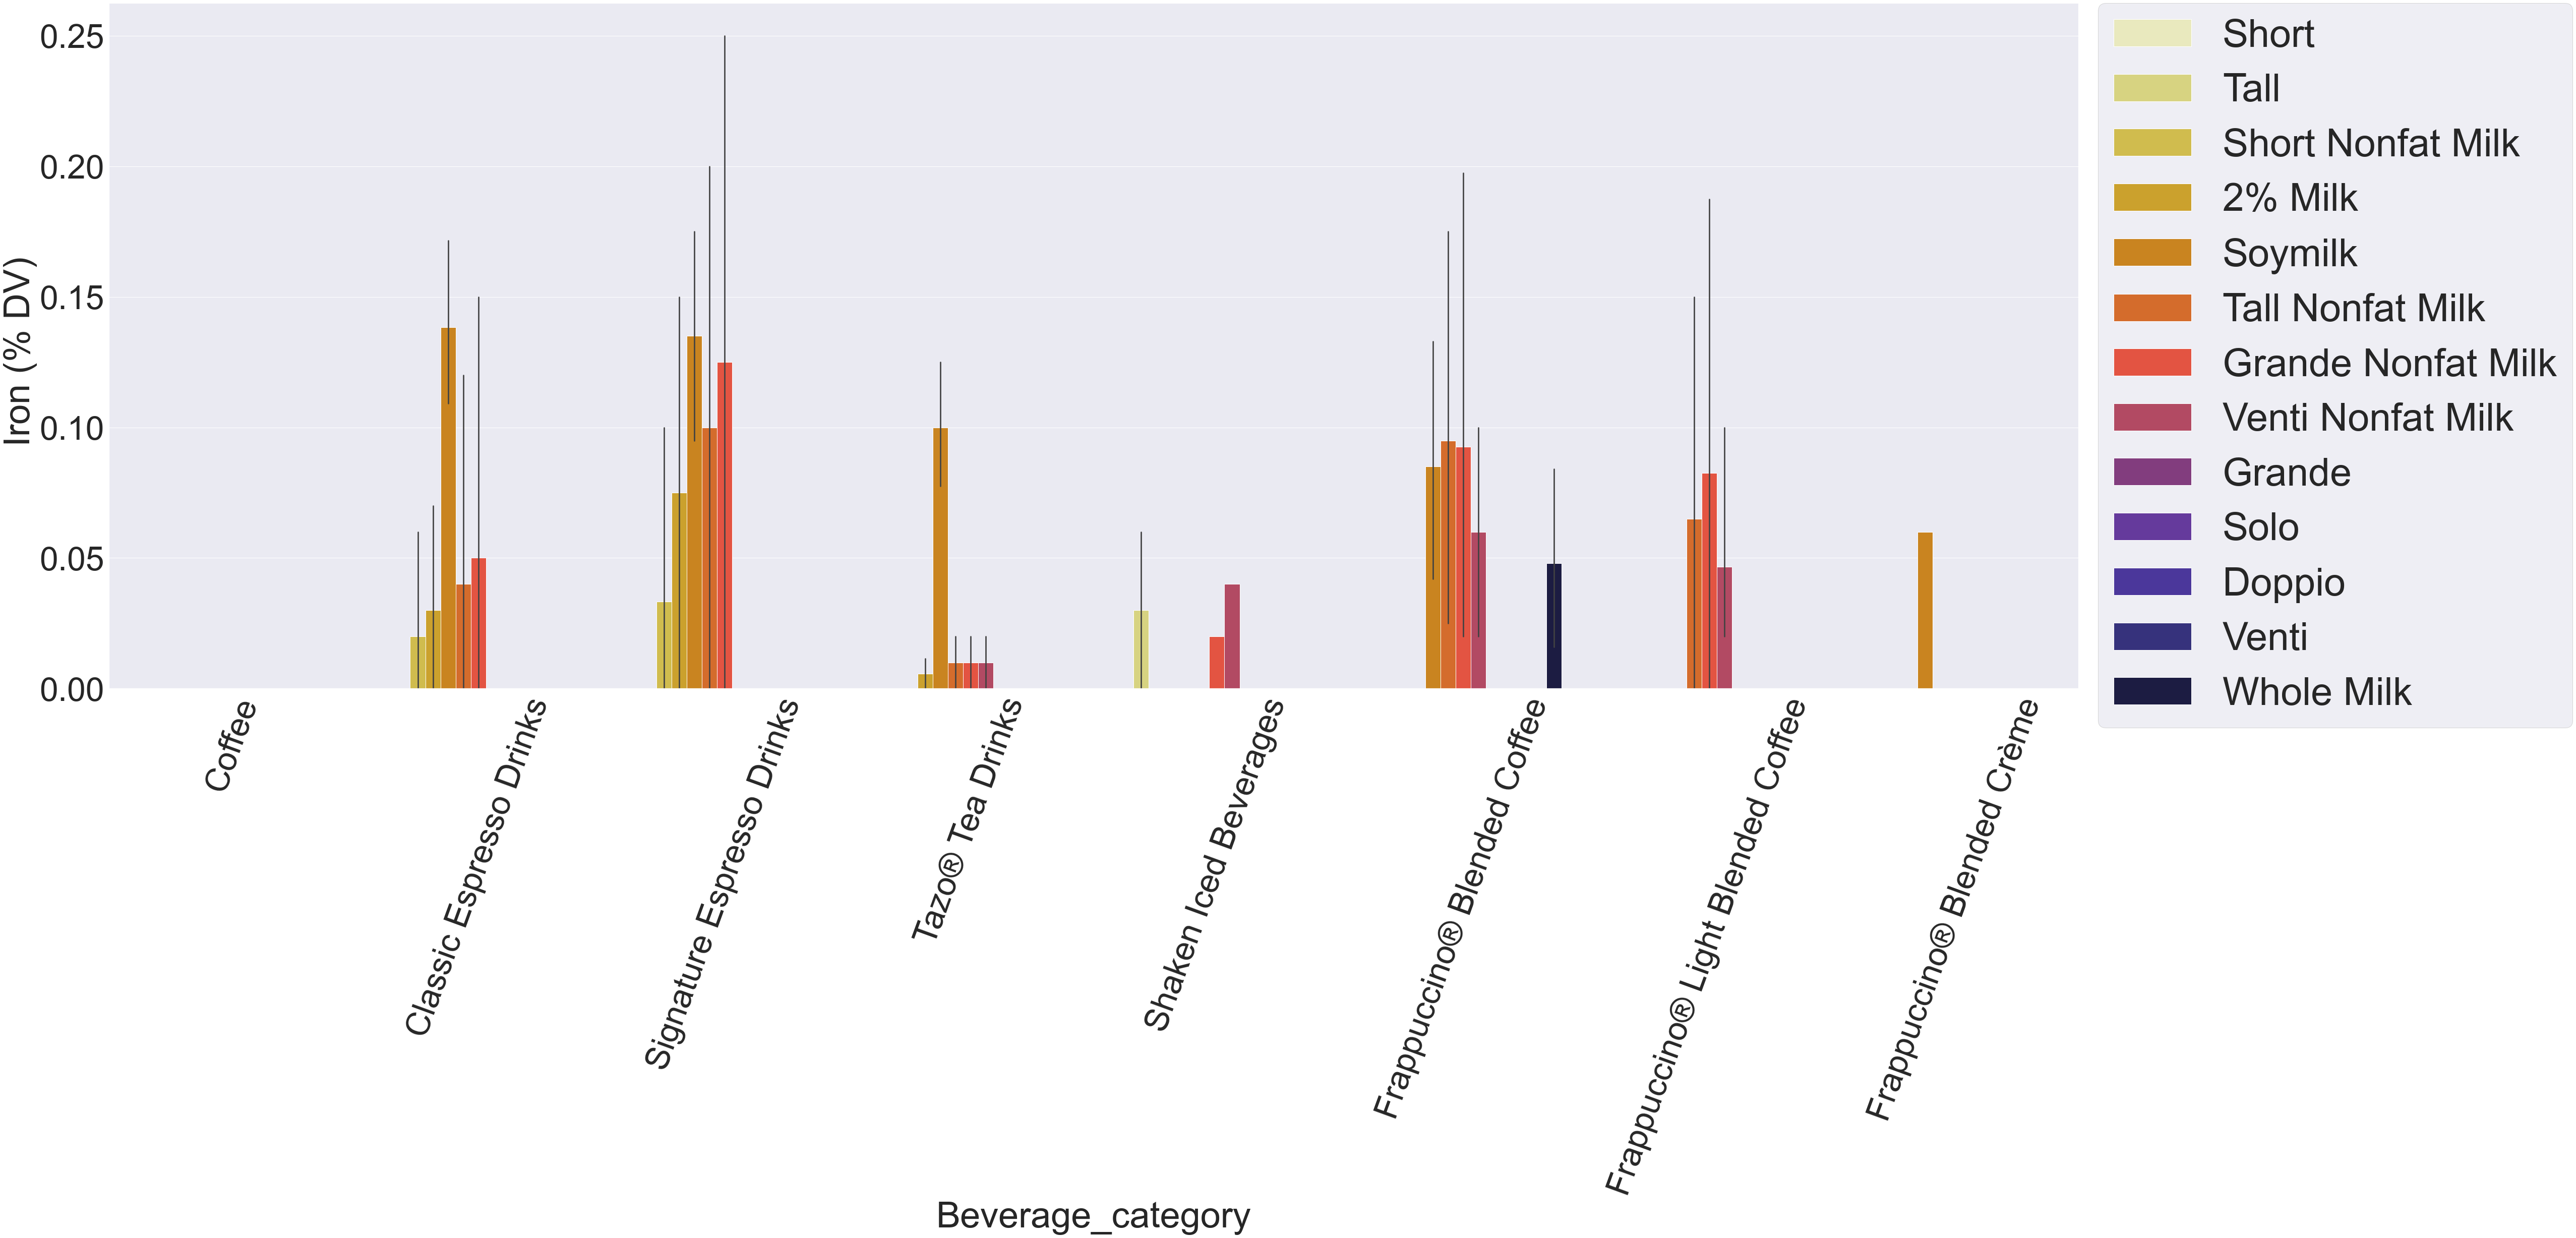

In [90]:
# nutritionDF.plot(x="Beverage",y="Calories" ,linestyle="",marker="o",figsize = (19,15))
# plt.xticks(rotation=70)
# f, ax = plt.subplots(figsize=(27, 15))

# plt.figure(figsize=(100, 55))
fig,ax1=plt.subplots(figsize=(70,25))

# sns.lineplot(x="Beverage", y="Calories", hue="Beverage_prep", data=nutritionDF ,ax=ax1)
# plt.figsize=(45,25)
sns.set(font_scale = 7)
sns.barplot(x="Beverage_category", y='Iron (% DV) ', hue="Beverage_prep",  data=nutritionDF , palette="CMRmap_r" ,ax=ax1)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

plt.xticks(rotation=70)



### Here we can see that Signature Espresso Drinks have higher Iron content than the other beverage categories . This eventually means that they this category has higher dietary fibre content too which is healthy

# Comparing Protein Content

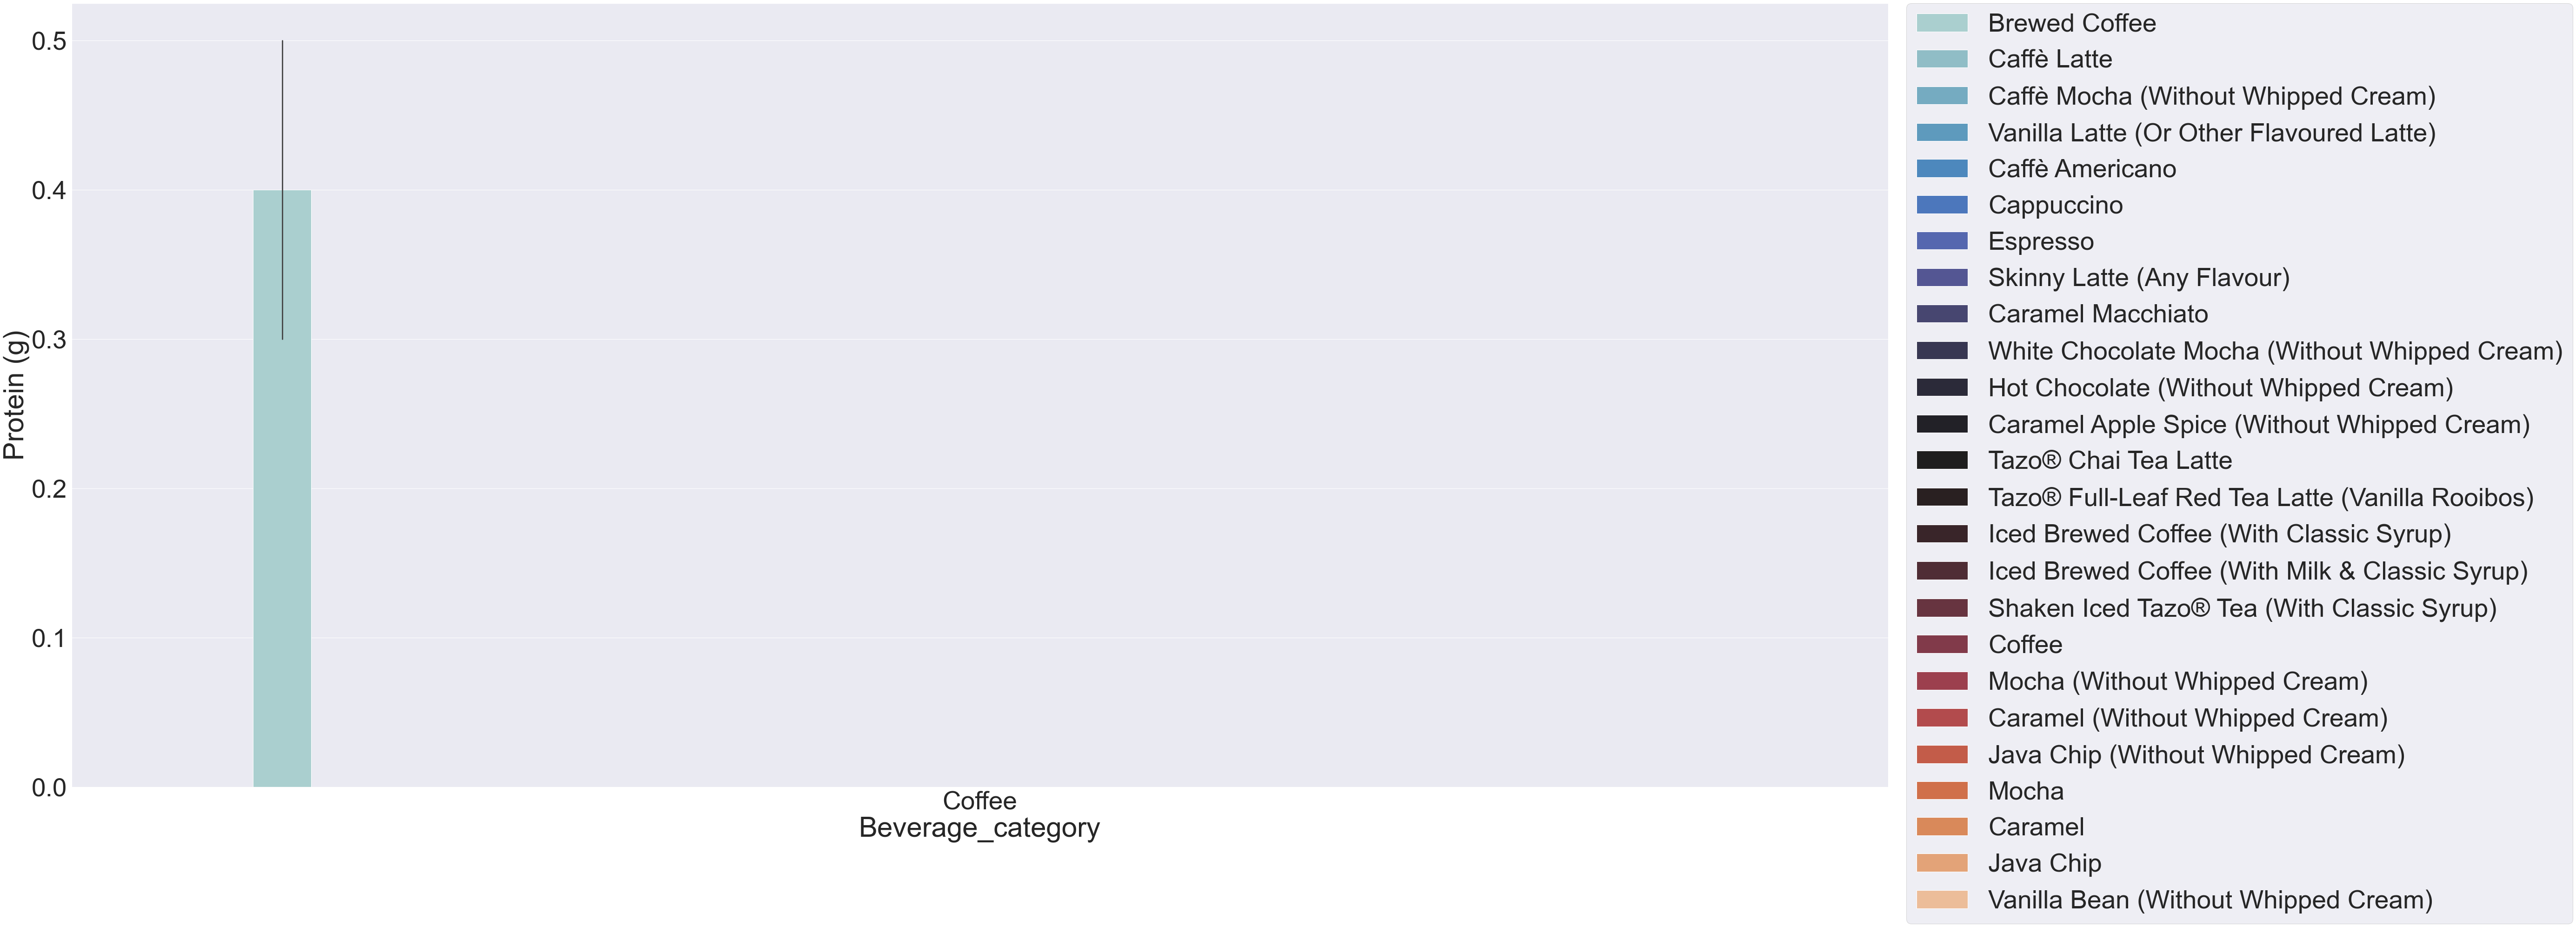

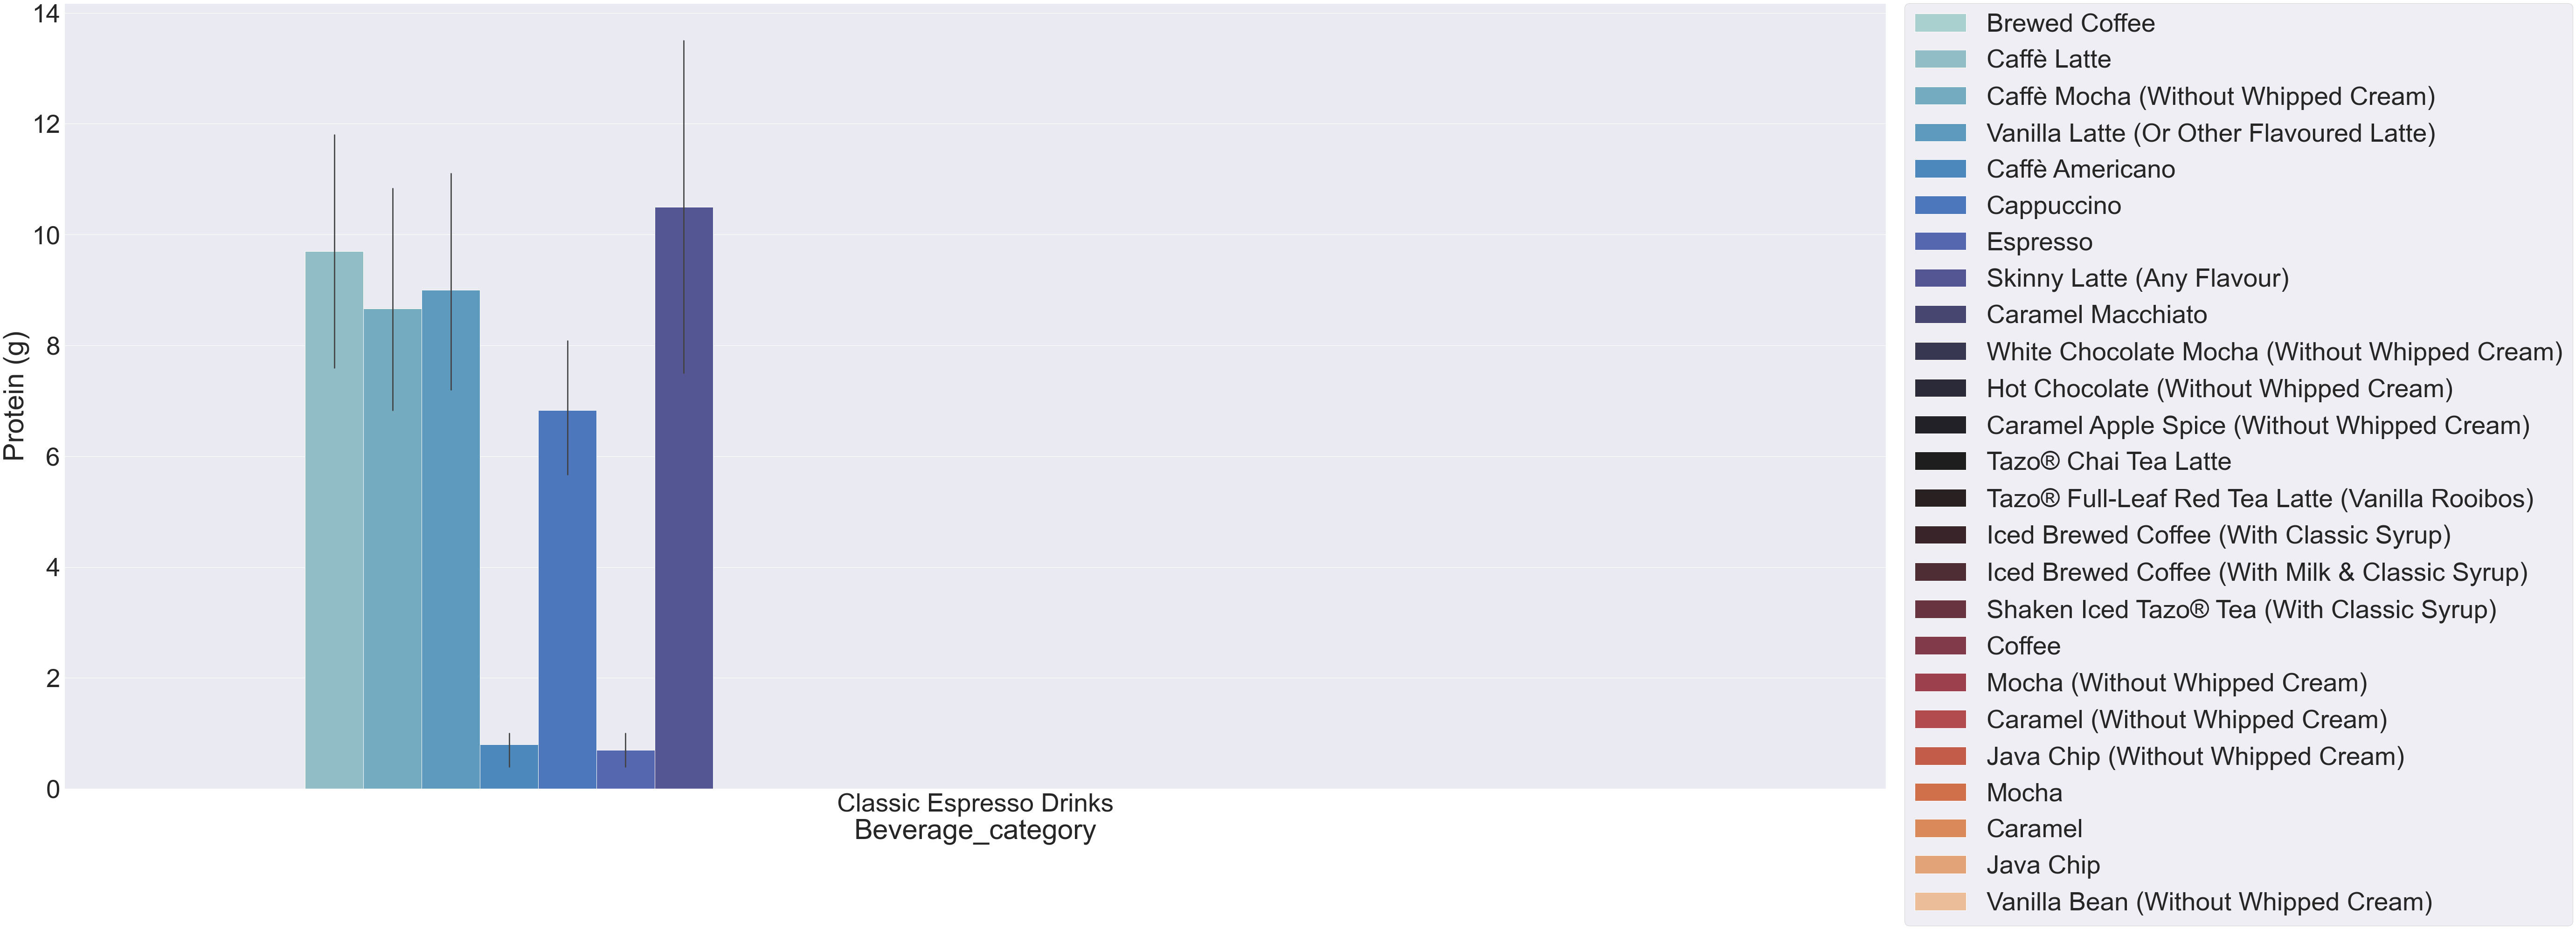

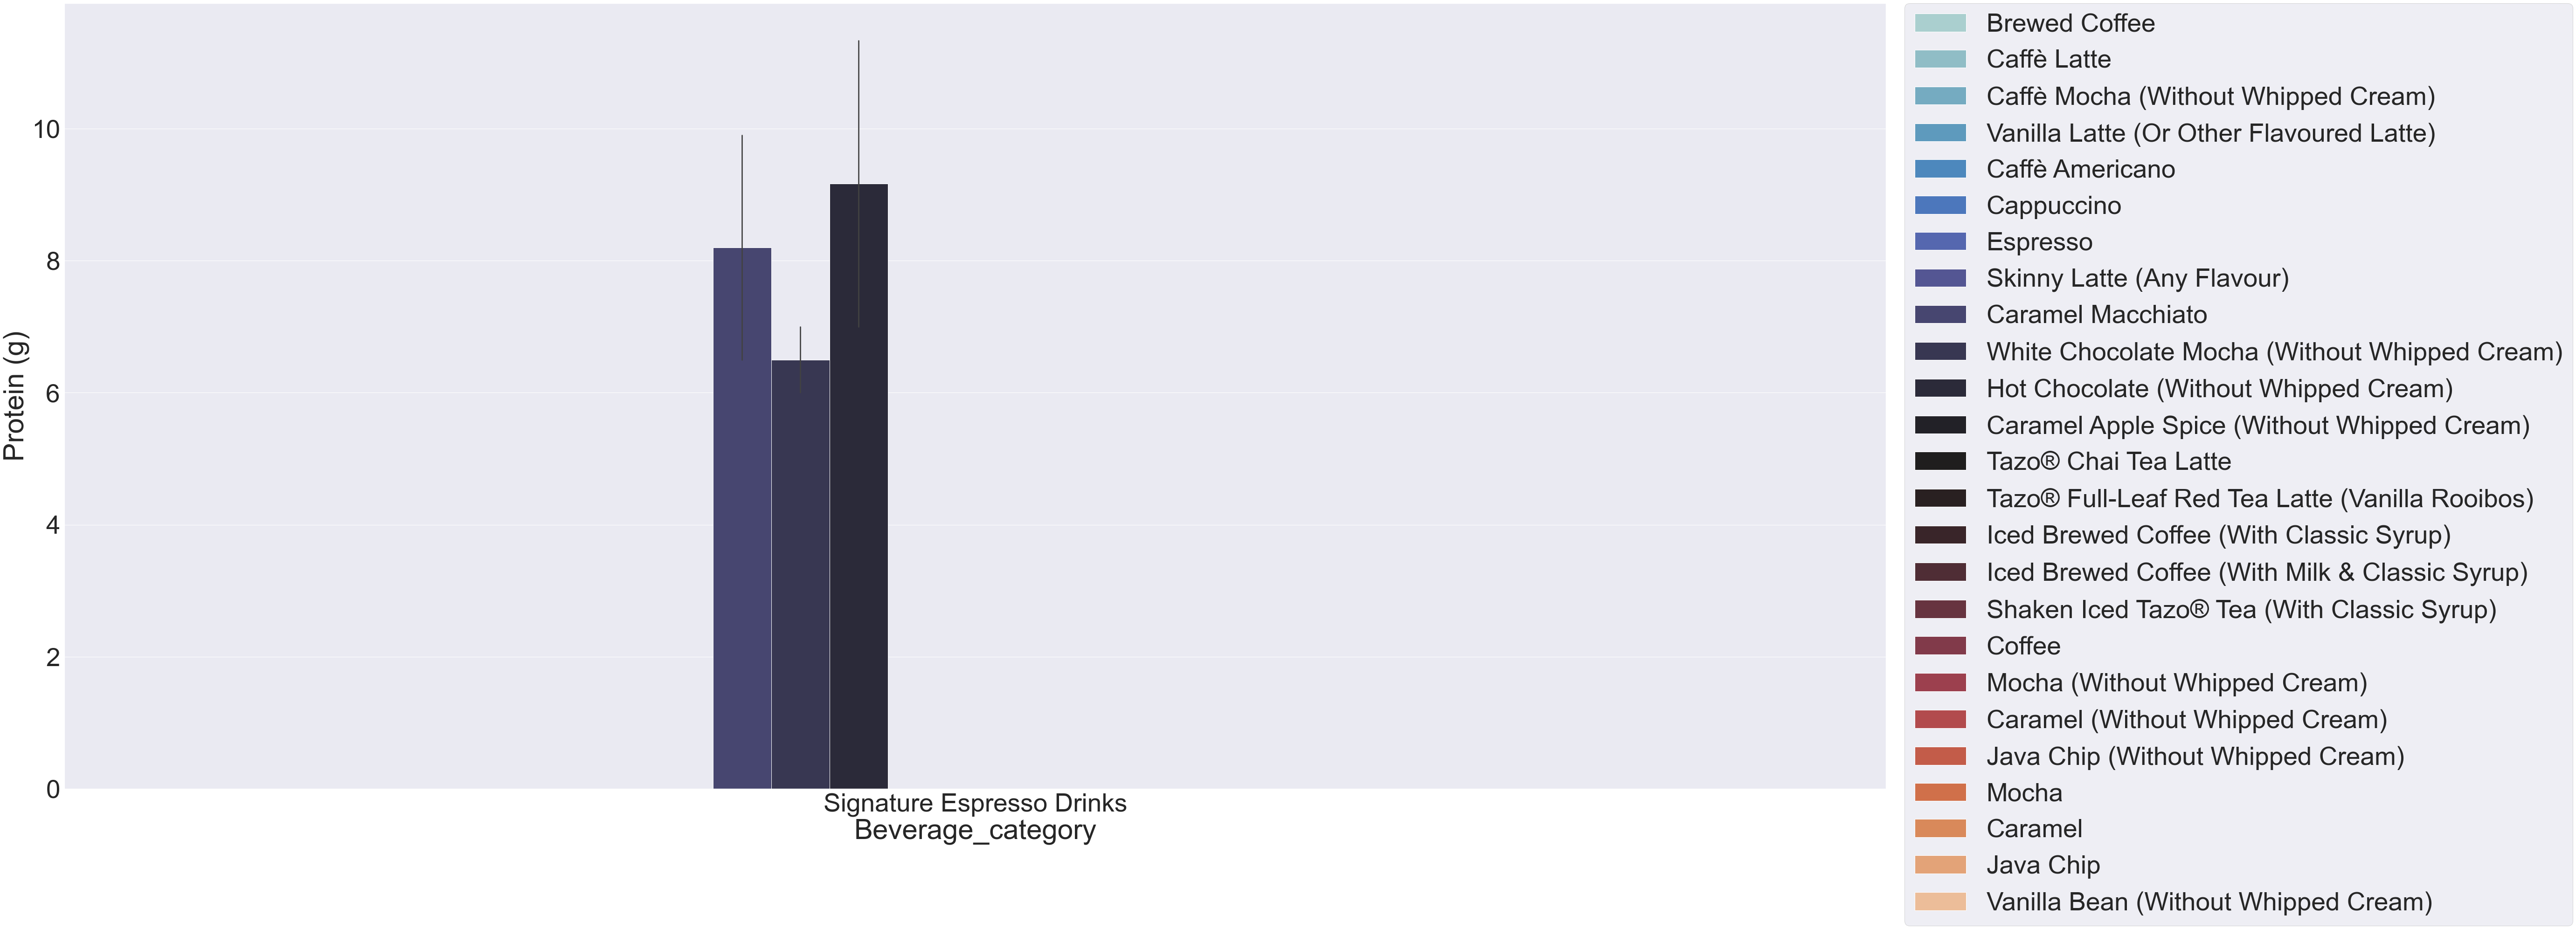

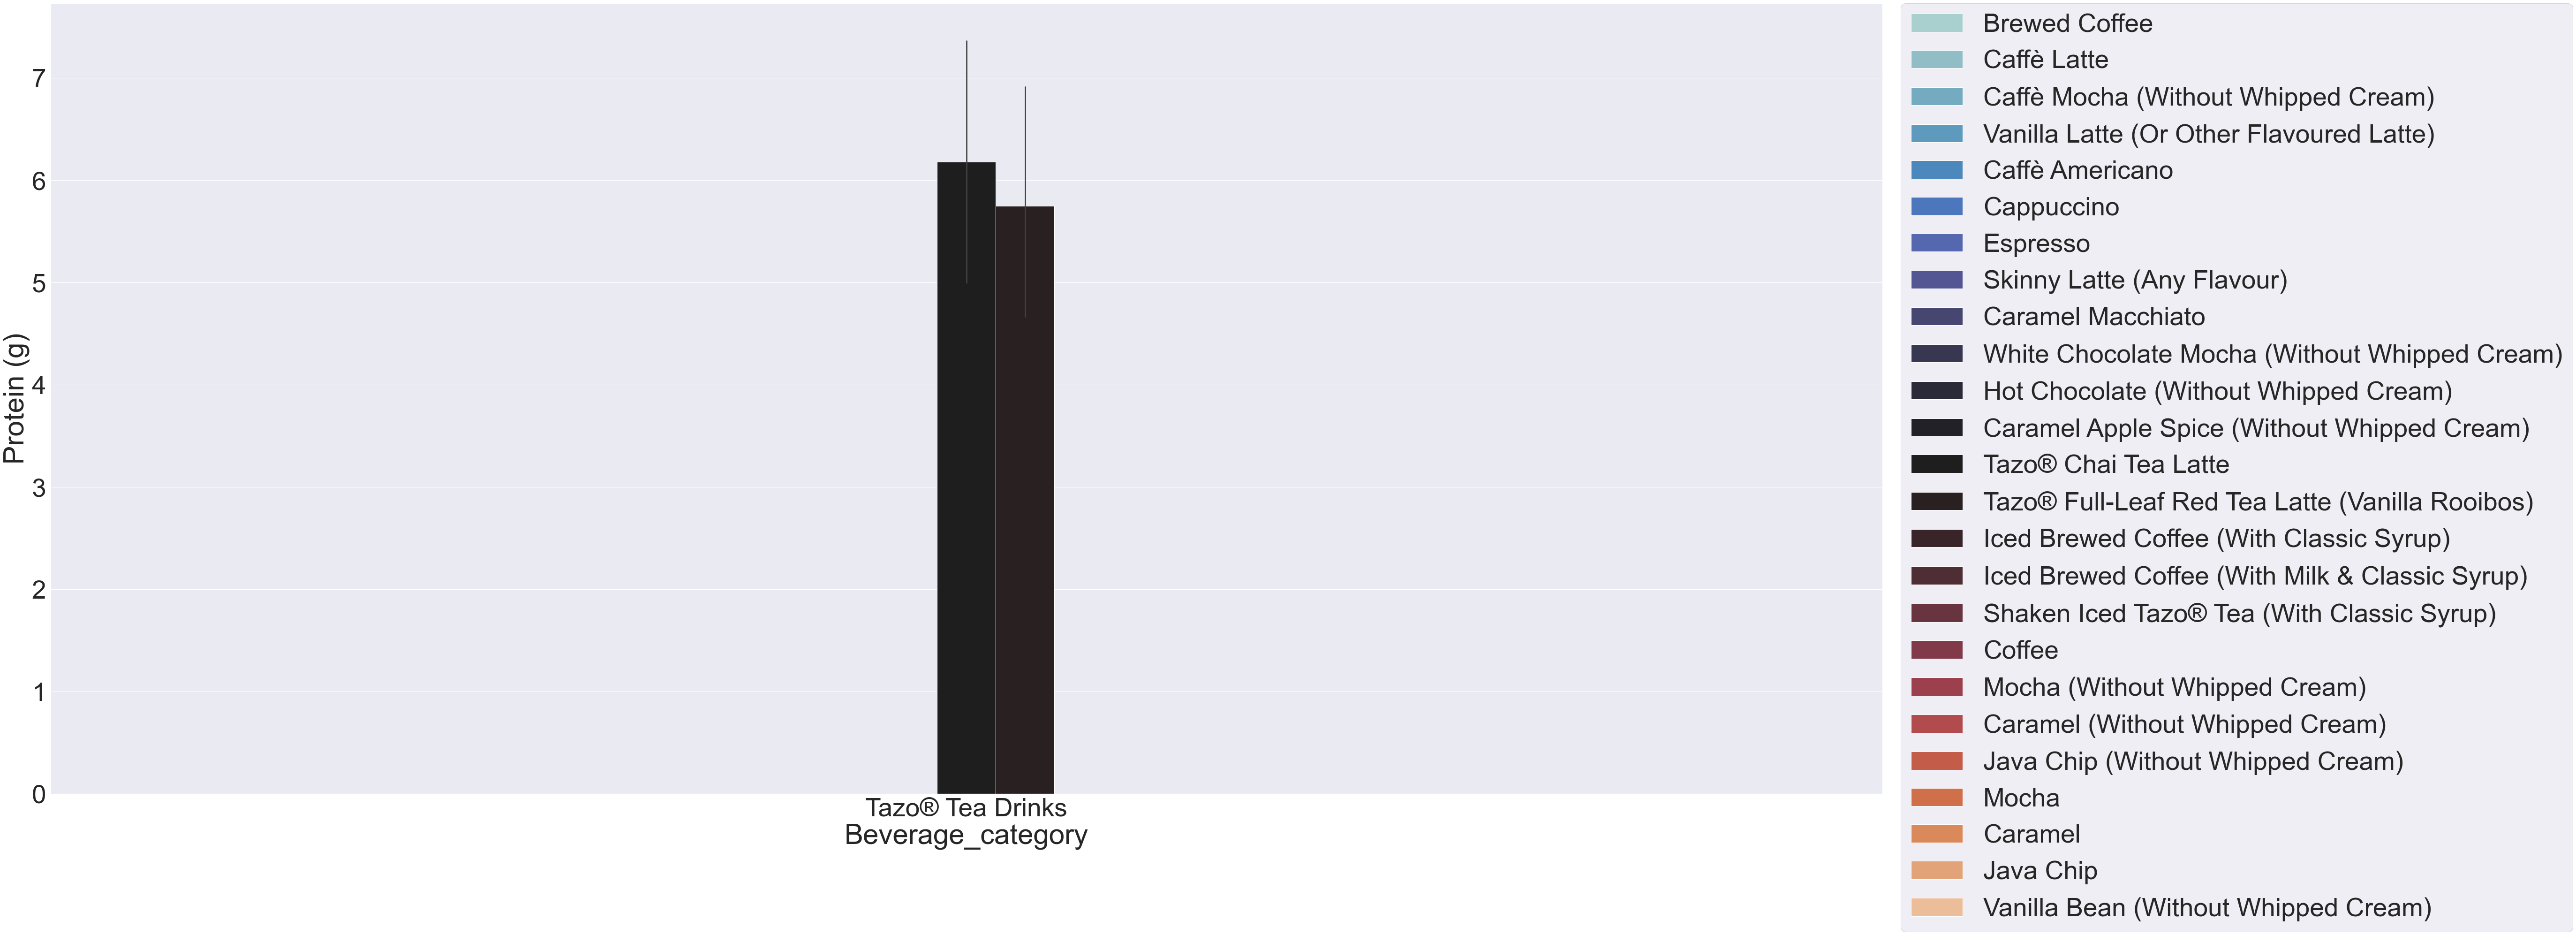

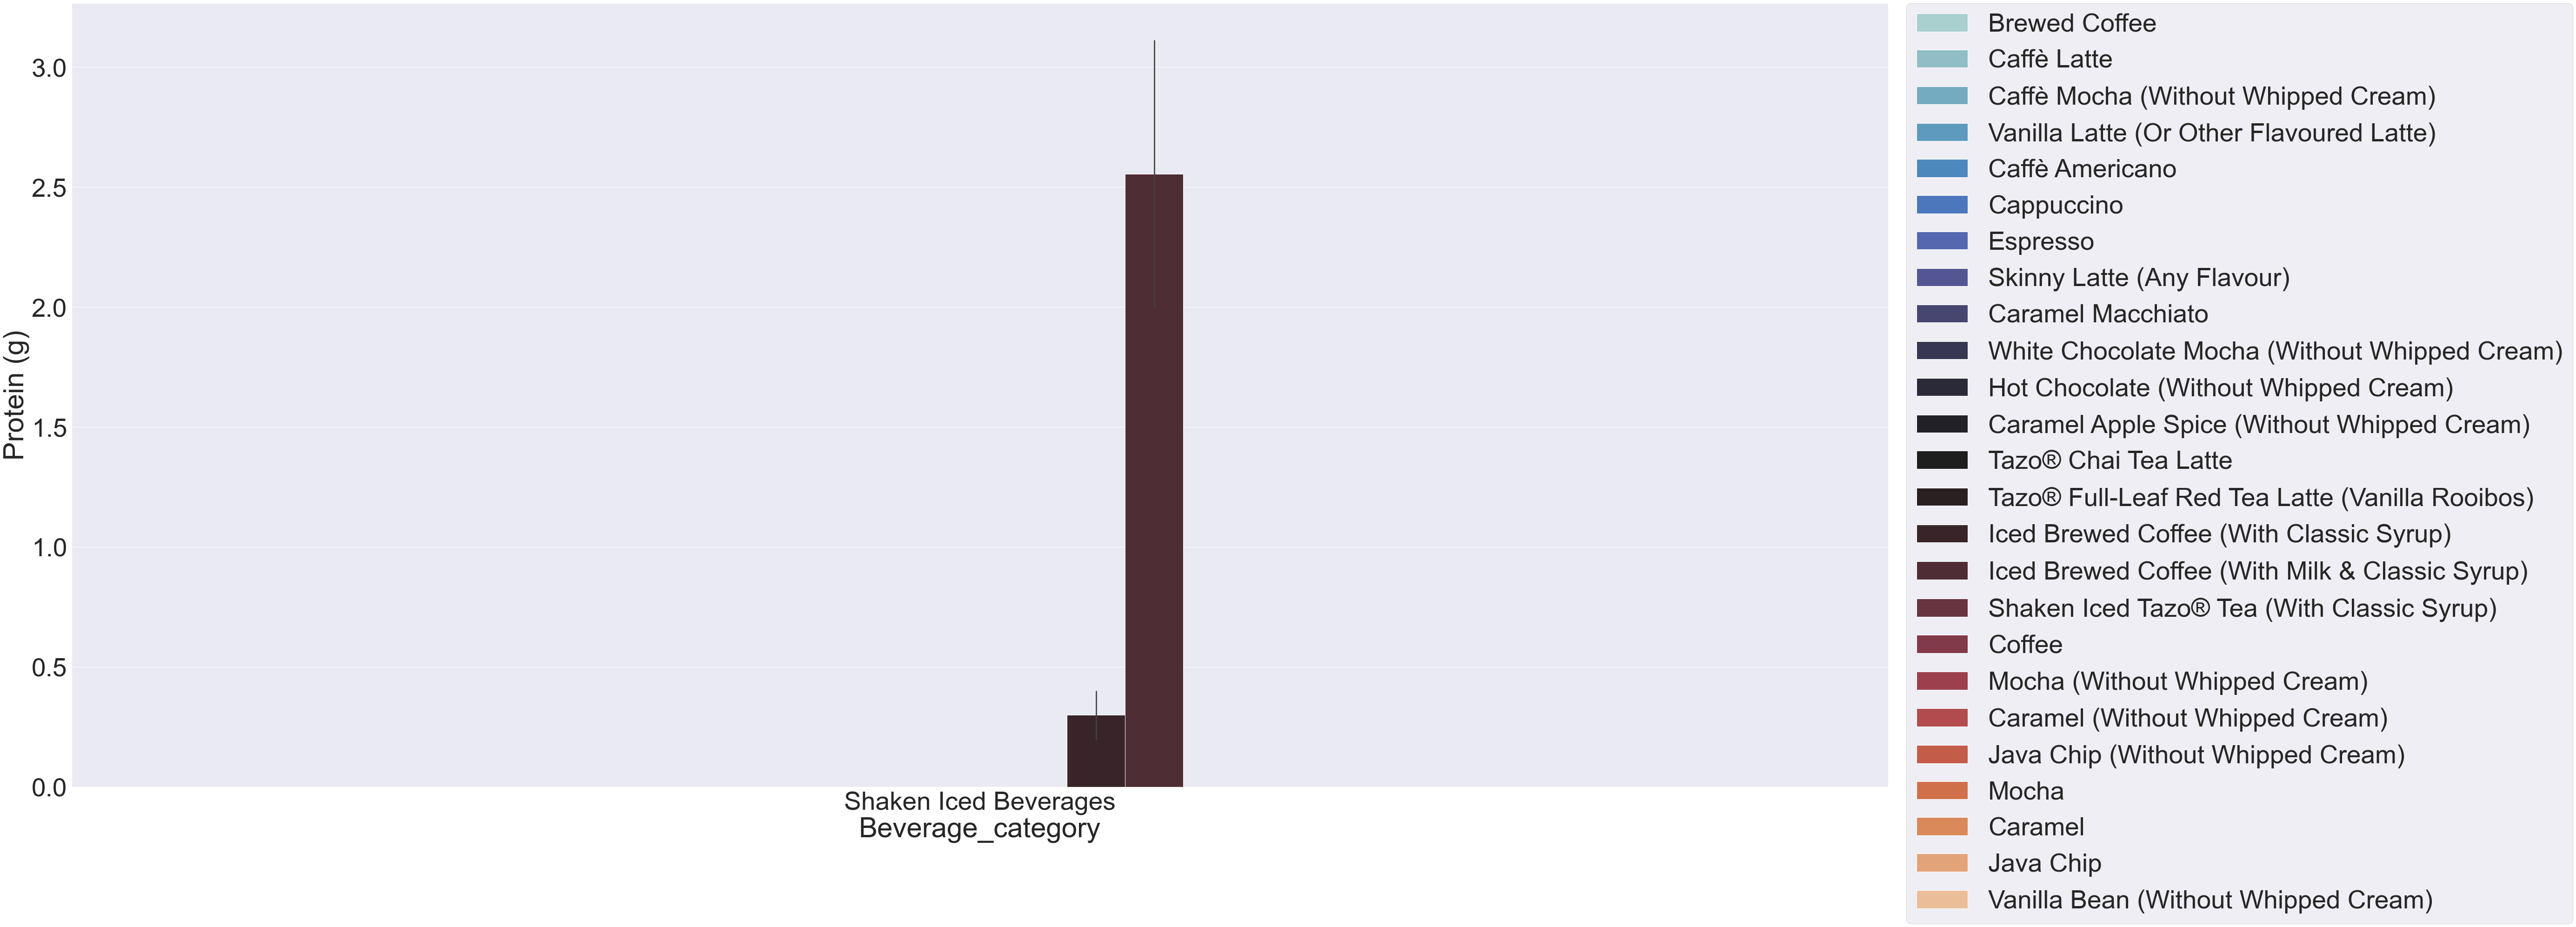

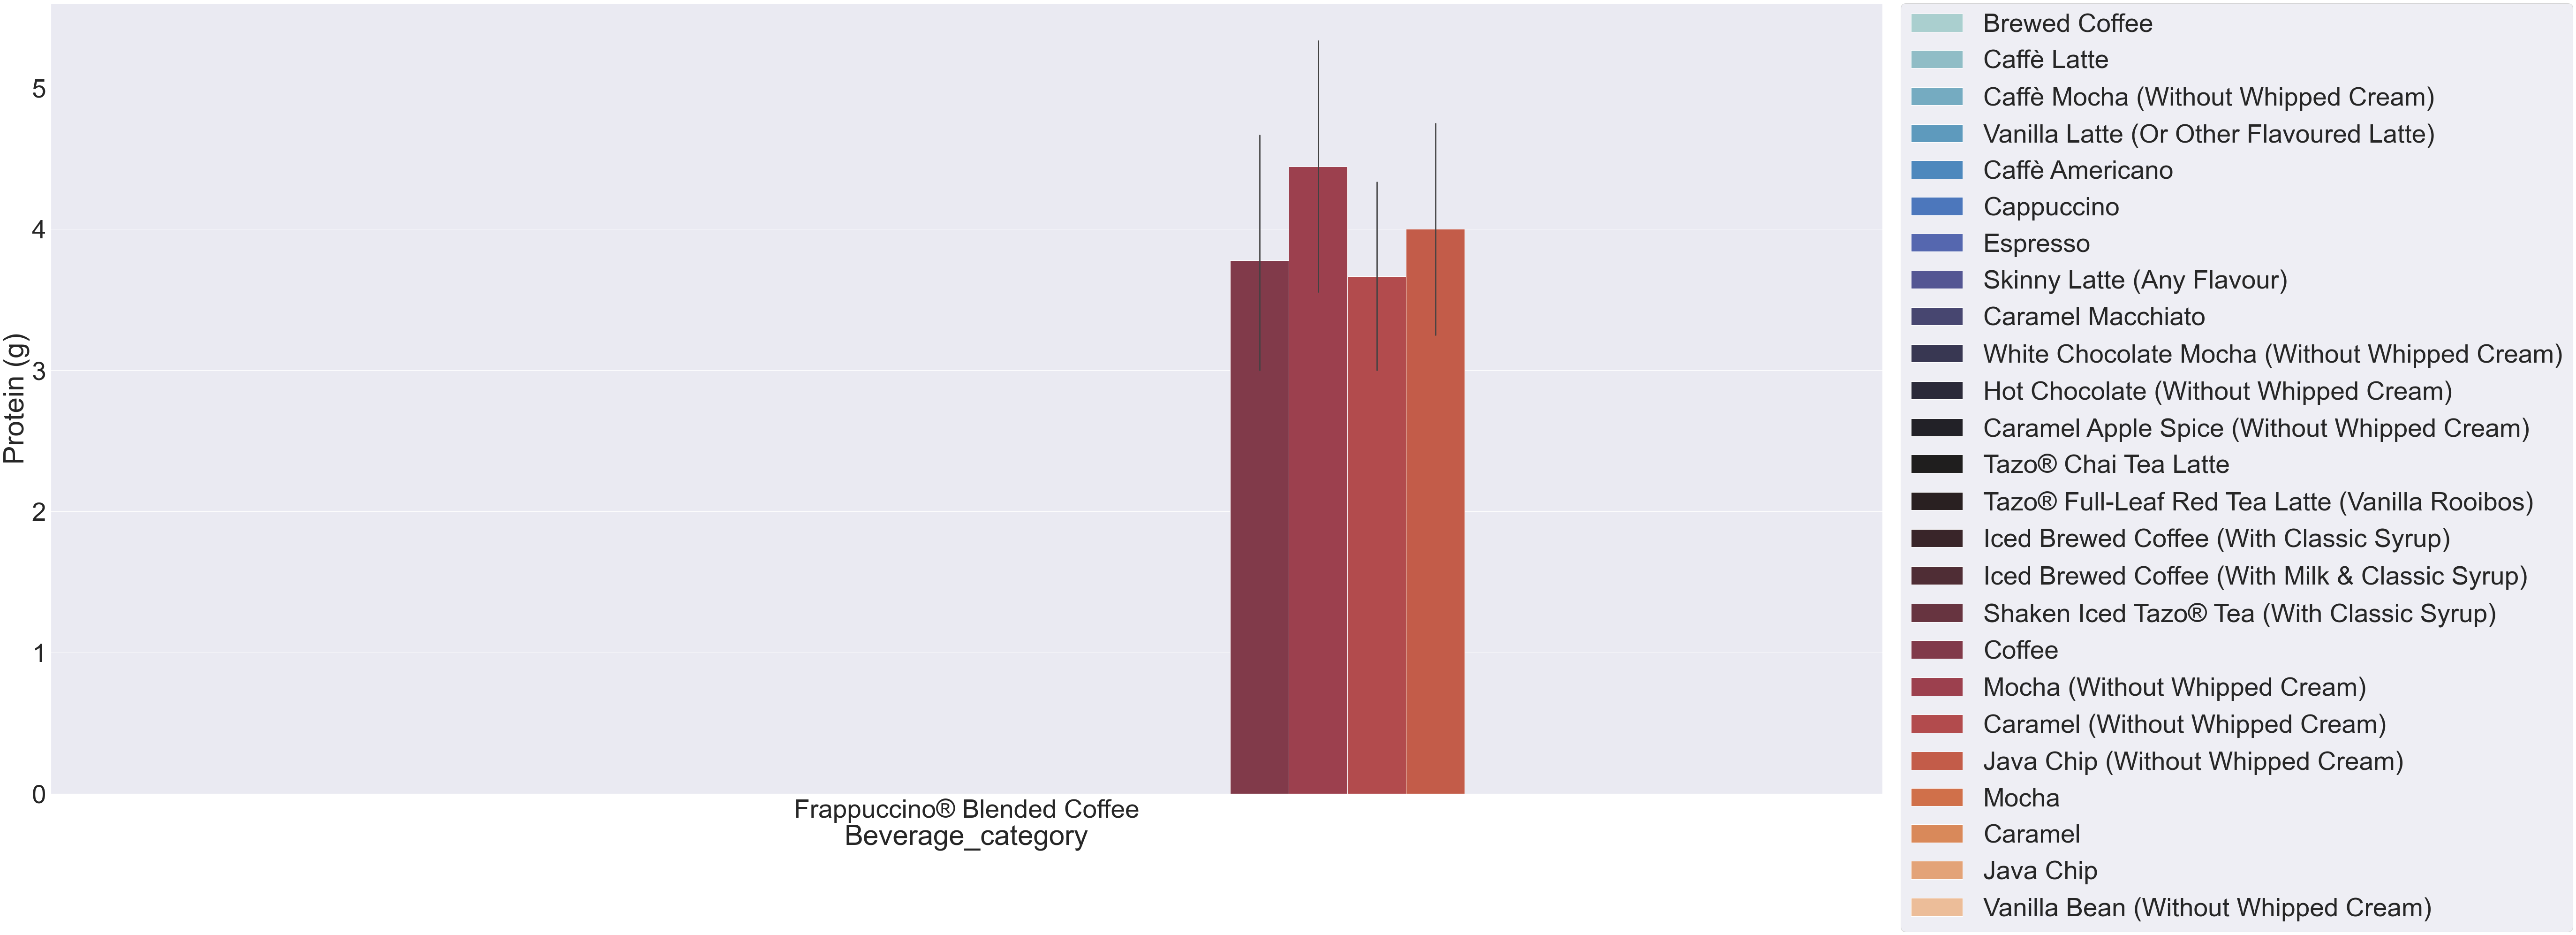

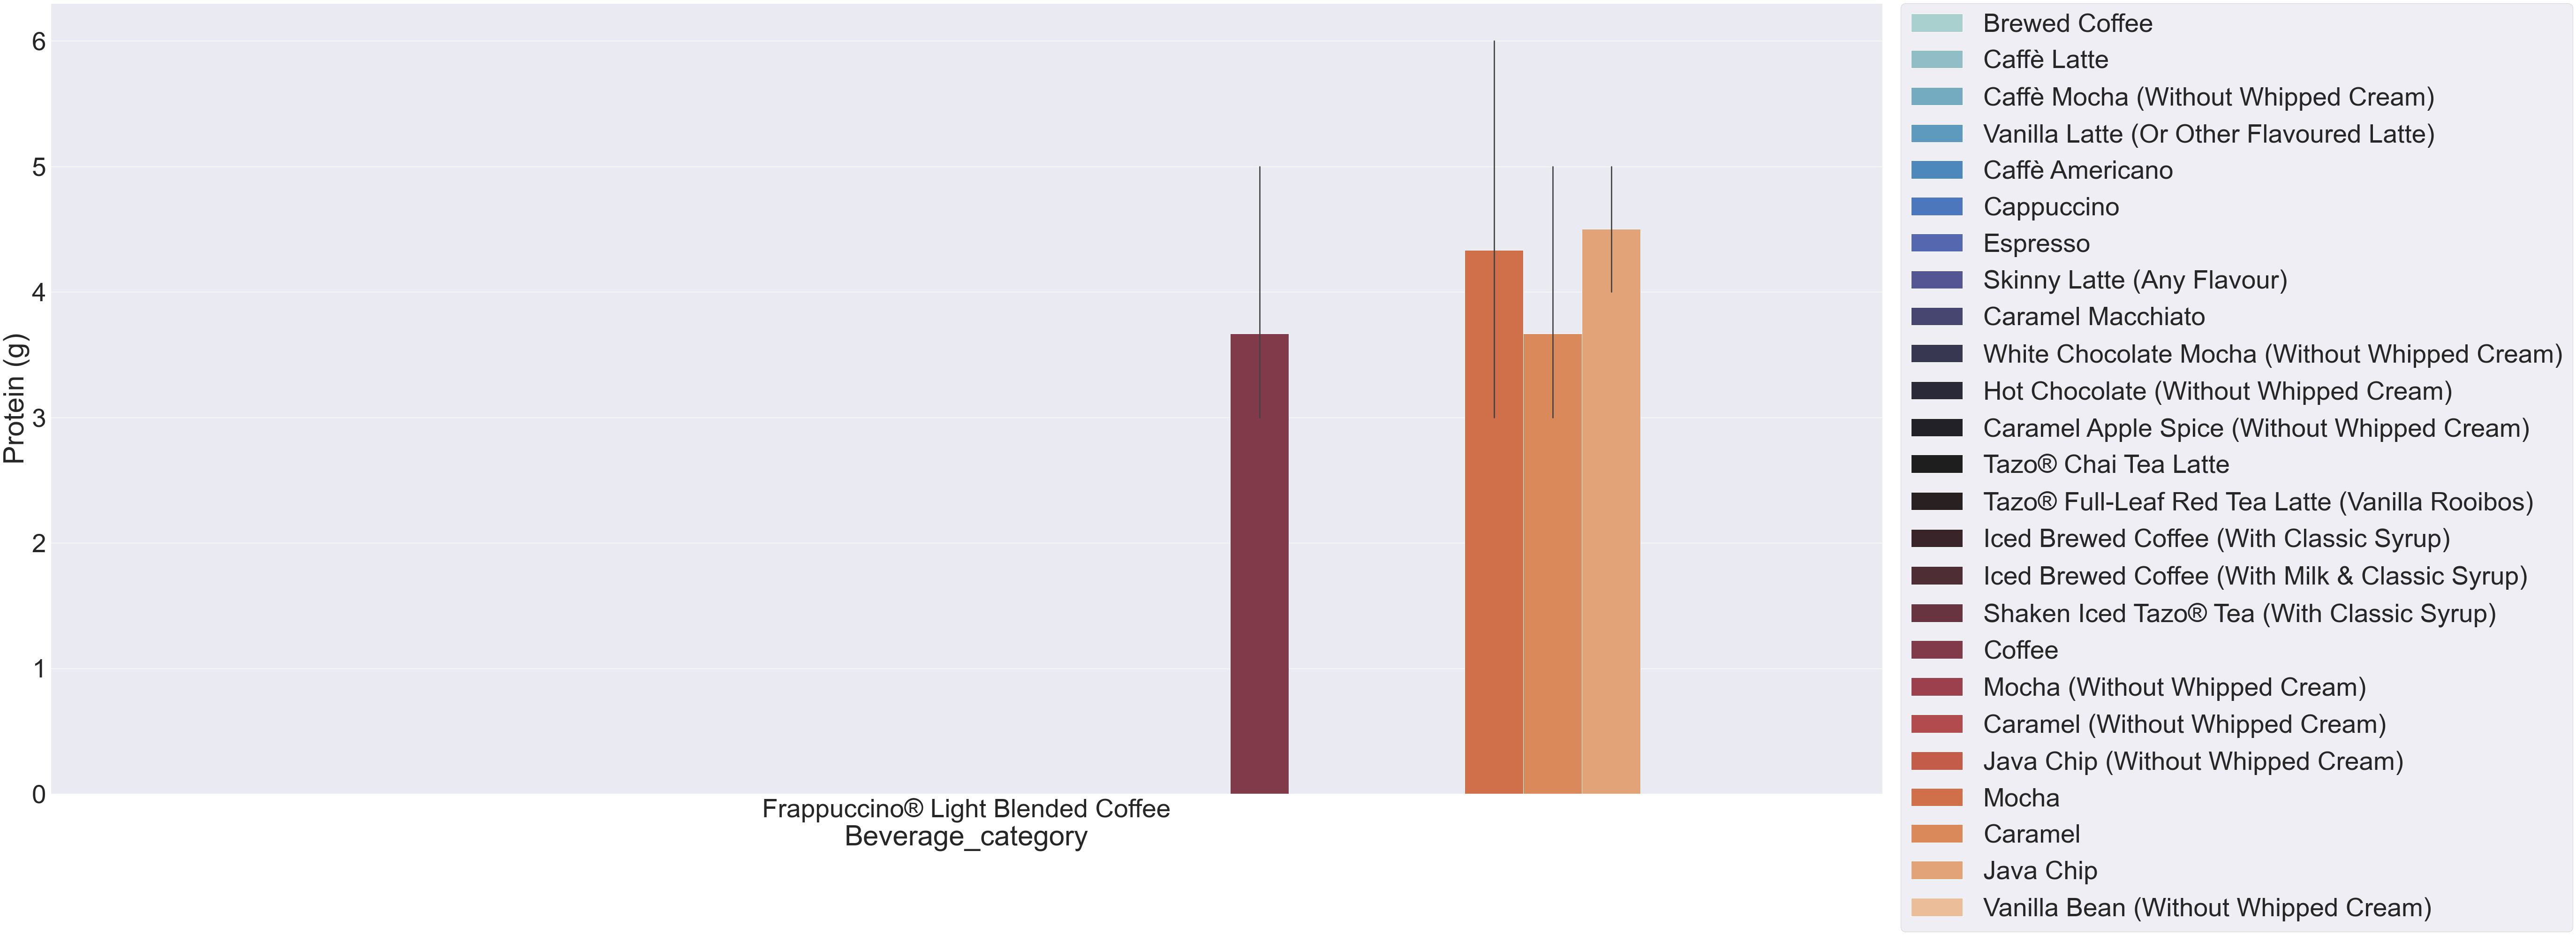

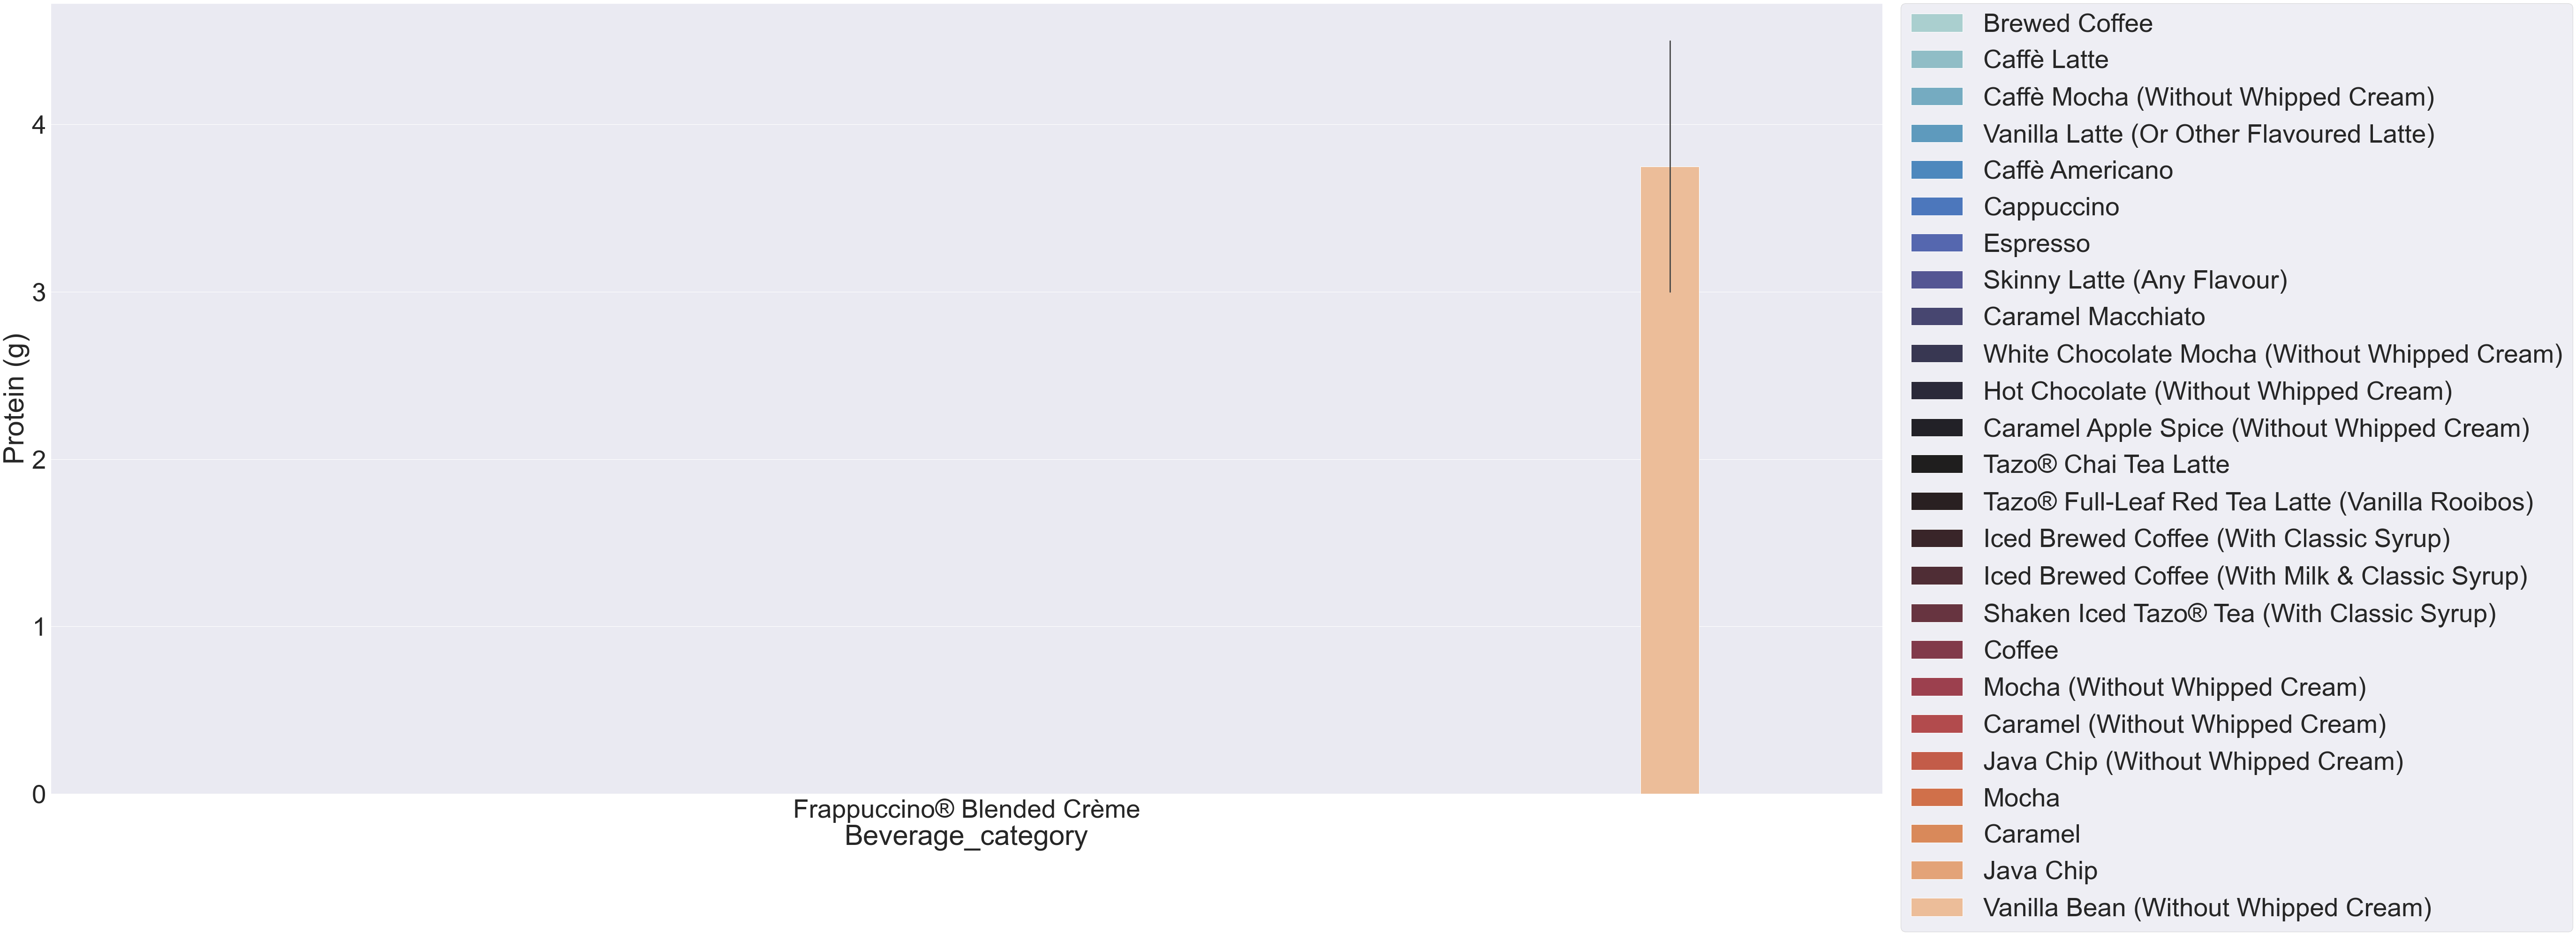

In [93]:
BeverageCategories = nutritionDF["Beverage_category"].unique()
for catg in BeverageCategories :
    fig,ax1=plt.subplots(figsize=(70,31))
    sns.set(font_scale = 5)
    sns.barplot(x=nutritionDF[nutritionDF["Beverage_category"]==catg]['Beverage_category'], y=' Protein (g) ', hue="Beverage",  data=nutritionDF , palette="icefire" ,ax=ax1)
    plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
